In [1]:
using DiffEqFlux, DifferentialEquations, Plots, DelimitedFiles

In [2]:
N = 10^7
dat = readdlm("covid.txt",',');
time_i = dat[:,1]; # times
Infected = 50*dat[:,2]/N; # Normalize data
Infected[2:end] = Infected[2:end];
A = Infected;

tshort_inds = (Int.(time_i)*10).+1
tshort = Int.(time_i).+1;

In [66]:
#tsteps = range(tspan[1], tspan[2], length = datasize)
tspan = (0.0, maximum(time_i))
tsteps = time_i
#=
function trueODEfunc(du, u, p, t)
    true_A = [-0.1 2.0; -2.0 -0.1]
    du .= ((u.^3)'true_A)'
end

prob_trueode = ODEProblem(trueODEfunc, u0, tspan)
ode_data = Array(solve(prob_trueode, Tsit5(), saveat = tsteps))
ode_data = ode_data[1,:]
=#
ode_data = Infected
u0 = Float32[0.0; 0.0; 0.0; 0.0]


dudt2 = FastChain(FastDense(4, 100, relu),
                FastDense(100, 50, relu),
                FastDense(50, 4))
prob_neuralode = NeuralODE(dudt2, tspan, Vern7(), saveat = tsteps, abstol=1e-6, reltol=1e-6)

function predict_neuralode(p)
  Array(prob_neuralode(u0, p))
end

function loss_neuralode(p)
    global tsteps
    pred = predict_neuralode(p)
    k = size(pred,2)
    t_loc = Int.(tsteps[tsteps .<= k] .+1)
    #lloss = sum(abs2, (ode_data[1:size(pred,2)] .- pred[1,:]))
    loss = sum(abs2, (ode_data[1:length(t_loc)] .- pred[1,t_loc]))
    return loss, pred
end

iter = 0
callback = function (p, l, pred; doplot = false)
  global iter
  global tsteps
  iter += 1
  display(l)
  if doplot
    # plot current prediction against data
    k = size(pred,2)
    t_local = tsteps[tsteps .<= k]
    plt = scatter(t_local, ode_data[1:length(t_local)], label = "data")
    scatter!(plt, 0:k-1, pred[1,:], label = "prediction")
    display(plot(plt))
  end
  return false
end

#58 (generic function with 1 method)

In [3]:
#start1=35
#end1=42
#prob_neuralode = NeuralODE(dudt2, (tsteps[start1],tsteps[end1]), Tsit5(), saveat = tsteps[.!(xor.(tsteps .<= tsteps[end1],tsteps .>= tsteps[start1]))])
#result_neuralode2 = DiffEqFlux.sciml_train(loss_neuralode, prob_neuralode.p,ADAM(0.05), cb = callback,maxiters = 500)
#callback(result_neuralode2.u,loss_neuralode(result_neuralode2.u)...;doplot=true)

In [84]:
#t1 = 10.0
#prob_neuralode = NeuralODE(dudt2, (0.0,t1), Tsit5(), saveat = 0:t1)
#result_neuralode2 = DiffEqFlux.sciml_train(loss_neuralode, prob_neuralode.p,
#                                           ADAM(0.05), cb = callback,
#                                           maxiters = 500)
#callback(result_neuralode2.u,loss_neuralode(result_neuralode2.u)...;doplot=true)

In [85]:
#t2 = 31.0
#prob_neuralode = NeuralODE(dudt2, (0.0,t2), Tsit5(), saveat = 0:t2)
#result_neuralode3 = DiffEqFlux.sciml_train(loss_neuralode,
#                                           result_neuralode2.u,
#                                           ADAM(0.05), maxiters = 1000,
#                                           cb = callback)
#callback(result_neuralode3.u,loss_neuralode(result_neuralode3.u)...;doplot=true)

In [80]:
#t3 = 60.0
#prob_neuralode = NeuralODE(dudt2, (0.0,t3), Tsit5(), saveat = 0:t3)
#result_neuralode4 = DiffEqFlux.sciml_train(loss_neuralode,
#                                           result_neuralode3.u,
#                                           ADAM(), 
#                                           maxiters = 1000,
#                                           cb = callback)

In [78]:
#callback(result_neuralode4.u,loss_neuralode(result_neuralode4.u)...;doplot=true)

0.0035319153750000003

160.83007171233817

0.16108641248573297

3.0490647116911607

3.410056163586477

1.618027193598591

0.7374587554810201

0.4390803886641127

0.31859201532193504

0.2963425957668014

0.25557099366750485

0.23206381310266244

0.27186220979080067

0.23666963219138057

0.2593805710816943

0.27428935381404995

0.28417854318022995

0.2890422691632579

0.2907938809214578

0.29057555043599287

0.2882181798236899

0.28387731786649084

0.27783018347494715

0.27039488804340445

0.2612924271308481

0.2511618211574198

0.2399975355897142

0.2280506100978963

0.21626647017854095

0.2053396669727936

0.19454647319384355

0.18429738651324687

0.1748175820927746

0.16690642366203512

0.15958761223003423

0.15254999354710488

0.1457406415262276

0.1392004353975083

0.13312808361865705

0.12761233938424577

0.12251856599160492

0.11774901952552463

0.11318141505282388

0.10869611092547832

0.10415776177494067

0.09953884187981117

0.09499089241852564

0.09066903834694176

0.08673719691494673

0.08316086367571396

0.07990395707549733

0.07719172221696022

0.07456555266220777

0.07189869116655957

0.06924632782255882

0.06655262845373586

0.06389127637229308

0.06127630277519297

0.05865795200562404

0.0559998168748274

0.05327639378741768

0.05047298712234004

0.047306372242042746

0.04356608434480822

0.04031417778904335

0.03808633378788327

0.03628285867984273

0.03429625446315869

0.03206472944191685

0.029721152806776868

0.027848407984479295

0.02652391170905135

0.027073043325403952

0.026589050958500015

0.024824001244220913

0.023066872035165827

0.021972038121629033

0.021349461708934075

0.020747914079024682

0.02024533675653876

0.01971725591439827

0.019089973664690056

0.018487451237376093

0.017949771427946435

0.01752261214665644

0.017155595461382636

0.0167782283242006

0.016369598325795702

0.015968645164236753

0.0155398892520149

0.015111814359591847

0.014660350522829541

0.014232197499552285

0.013823237075183178

0.013401508817713622

0.013001683154225747

0.012628687899637756

0.012270989403124218

0.01193215475384191

0.011607177352602732

0.011308882162548613

0.011003651603689595

0.010706933837054507

0.010428132646878238

0.01015050454167166

0.009892883889171202

0.009645453780328047

0.009391491121286061

0.009162649699977748

0.008913440818363283

0.00867941308714693

0.008453664945635549

0.00823669107232936

0.008024035889875665

0.00782412554978655

0.007608712204084884

0.007403901033857661

0.007212989487724296

0.007027307241545371

0.00683137835013539

0.0066589272179078856

0.0064902079467020965

0.006328960248224023

0.0061729192019843145

0.006020820646478741

0.00587721428114631

0.005735144246875969

0.0055937285928664305

0.005456410164254695

0.005320084624749553

0.00518627127911254

0.005051434991265978

0.004925019412695375

0.0048002191834486795

0.00468247949089368

0.004571841127011974

0.004460734892363427

0.004363506746285478

0.004267949686543341

0.004171983203898904

0.00407530633997316

0.003975067001893642

0.0038816615064059695

0.0037854671687994313

0.0037054743513230946

0.0036250987526741272

0.0035474475114432545

0.003477927475884094

0.003393176129999444

0.0033264305634495422

0.0032475926819815256

0.003185121074026053

0.003112995043925336

0.003055054418369233

0.0029950499416944274

0.002932196187881471

0.0028737190319636017

0.0028118986060599654

0.00276317152525336

0.002708201967617109

0.002661863525458338

0.002608233406317188

0.002561610572075484

0.002513589628481721

0.0024697683844696373

0.002425303806991858

0.002386437960377321

0.002344444429509638

0.0022973820514875496

0.0022640109939787304

0.0022278040654423073

0.002191504010064938

0.002158185438310099

0.0021210791101207637

0.002084501819058134

0.002055855283496385

0.002021831412775619

0.0019929651348279953

0.0019506230270737363

0.001929127496922171

0.0018913257652908952

0.0018632405650397116

0.0018370502848607491

0.001813007307959396

0.0017756283713511278

0.0017452354673395034

0.0017123184281436449

0.001684424770423658

0.0016588301593972376

0.0016328363485034146

0.0016098847612776557

0.0015830013551883415

0.0015590021151196632

0.0015361783396761557

0.0015213341242281686

0.0015019967786133815

0.0014803611537692126

0.0014594584793925058

0.0014380954648634547

0.0014220599213625828

0.00140406832802571

0.001384845807175677

0.001369651892914279

0.0013493609920169401

0.0013368361817321147

0.0013179521064552232

0.001305641272142348

0.00129075000200319

0.0012781502051217625

0.001263941505773811

0.0012515171173859585

0.001234855934474213

0.0012242594228145307

0.0012077411792692095

0.0011938973303836217

0.0011826588257226479

0.0011731678415790201

0.0011602151396404427

0.0011530835487606776

0.001139461105506862

0.0011324200933738686

0.0011179137171320234

0.0011081114522161549

0.0010978116412884518

0.0010911647482351383

0.0010805067333733878

0.00107466406502038

0.0010598026100660293

0.0010527477338593814

0.0010453031735723761

0.0010359721620403842

0.001024932719796708

0.001018653211464883

0.0010117357023583084

0.0010031216000911212

0.000997192140911036

0.0009904304253034997

0.0009818939645338592

0.0009751715095083337

0.0009664710229961403

0.0009571573134745869

0.0009500392120994201

0.0009446424374496366

0.0009412140840314578

0.000933642437834305

0.0009269854718848465

0.0009184545546228542

0.000912800800075323

0.0009063671959693862

0.0009014805426737163

0.0008956713771973138

0.0008907639831369789

0.0008865270973971984

0.000878315226151414

0.0008761775650734154

0.0008703600580999521

0.0008662261935480069

0.0008588749709208059

0.0008580972439759262

0.0008476646840139447

0.0008449569352841795

0.000839551384614778

0.0008344319535078068

0.0008306699907935558

0.0008236583874470043

0.0008208905429519142

0.0008153833791154632

0.00081027237166127

0.0008070709909245779

0.0008033421667997936

0.0007966881806223527

0.0007958629897868081

0.0007894667348763513

0.0007859724465024477

0.0007854826540517393

0.0007780580822067515

0.0007744059160310595

0.0007703214591627376

0.0007701557669234796

0.0007638211703071572

0.0007605186645317538

0.0007553828872852173

0.0007532762030586454

0.0007495522473637081

0.0007439388456343329

0.0007402877287997954

0.0007374775207394552

0.0007339275872187374

0.0007320247259150083

0.0007299926260924526

0.0007248591479824063

0.0007222703363273428

0.0007179676978472038

0.0007148126689949839

0.0007124470405314928

0.0007085467049188309

0.0007048914874393138

0.0007039897249098413

0.0007006386006671307

0.000697827989652606

0.0006923282349099367

0.0006913211788623977

0.0006891697764889329

0.0006856255572204493

0.000682915125251171

0.0006820791914729325

0.0006797872797281801

0.0006738791863097197

0.0006711861241069315

0.0006658916844180646

0.0006641507475499733

0.0006609201759628494

0.0006594370350742683

0.0006564569132377753

0.0006540943454279834

0.0006544110190337843

0.0006500400579659612

0.0006473934647583677

0.0006418897030923845

0.0006435605008254295

0.000639085263980825

0.0006371192566191717

0.0006348969018012838

0.0006314149806415282

0.0006312248598235354

0.000627011292522884

0.0006262230781681495

0.000623546152800978

0.000619767559673047

0.0006187823202703805

0.0006150577191437058

0.0006137024791773567

0.0006098973076952214

0.0006081902689954791

0.000606030974703117

0.00060500468251089

0.000603626517925004

0.0005999621756098002

0.000599806751431222

0.0005945394939111336

0.0005931719233216385

0.0005913428998112408

0.0005878947434782233

0.0005886494664454652

0.0005862017300547595

0.0005830802153803978

0.0005814291842932749

0.0005795754195155943

0.0005770163220836131

0.0005748989141798041

0.0005734795105187568

0.0005716592778288055

0.000568849027237322

0.0005674190114186716

0.0005660107343683188

0.0005625642713293258

0.0005615541429857786

0.0005604055780146012

0.0005594970315834818

0.0005560307320246638

0.0005559067848096046

0.0005521312305269788

0.0005512766008740093

0.0005484701684922264

0.0005478386638219685

0.0005439515483708242

0.0005424541689466652

0.0005405895297253486

0.0005413307701317075

0.0005383815235462824

0.0005365163218068643

0.0005343726700780345

0.0005330573123205929

0.0005318561099628613

0.0005314480461955448

0.0005287516218749884

0.0005264672351825495

0.000525156247612268

0.00052373633385275

0.0005209145541027243

0.0005204637174118665

0.0005184833542743742

0.0005178346791779289

0.0005160378106892286

0.0005132784439901304

0.0005140142738800715

0.0005110699364692602

0.0005088164996300849

0.000507211351768915

0.0005052230700169909

0.0005034095400634467

0.0005016360697648502

0.0005011267756643077

0.0004993357895541896

0.0004987408226392405

0.0004957829599514577

0.0004940554265732739

0.0004932313704710601

0.0004927827577817922

0.0004930188179414657

0.0004886316175792378

0.00048792319422037575

0.0004846975636505898

0.00048391399366444943

0.0004837857053811695

0.0004821809361850748

0.00048103670321607154

0.00047909671161993294

0.00047767448468213653

0.00047685310573582977

0.0004753469921084559

0.00047203874775890697

0.0004728860287983508

0.00047036598379035955

0.0004702605133005413

0.00046630777028189584

0.00046618356871138154

0.0004650567649199395

0.00046248543884726745

0.00046206296005046296

0.00046150813740794246

0.0004579115887847622

0.0004579468373201543

0.0004557030475456468

0.00045436755312046773

0.0004530782944419494

0.0004516411472859637

0.0004512989164095003

0.0004494356567731313

0.00044798876032818547

0.0004478998398024692

0.0004465871460976538

0.0004456057208357291

0.00044295760344536465

0.00044172123683056813

0.000441129683124678

0.0004380517172766658

0.0004368311993676715

0.0004362919671909222

0.00043743227750172144

0.00043418888971824375

0.0004315541909262547

0.0004302812604210271

0.0004284278876042787

0.00042698128498970094

0.0004268341666205655

0.00042376672271298544

0.00042306076894058254

0.00042285848473923564

0.00041972940387800567

0.0004209426792792601

0.00041835643635984414

0.0004163593830968918

0.00041594617709912366

0.0004131202176696179

0.00041355154531833114

0.00041136185138866585

0.00040930918864995336

0.00040927231553707186

0.0004067943242028318

0.0004057071065724459

0.00040538064087907827

0.0004048976045068985

0.0004030208104611741

0.0004012123357349243

0.00040231785010378274

0.0003986902689707422

0.0003960931432524964

0.00039545836189310046

0.00039532411645320327

0.00039323198253725464

0.00039196150260239674

0.0003900399164296352

0.0003894221659168296

0.0003879396606381446

0.0003858747153713205

0.0003862057216209929

0.0003834396302556866

0.00038273784521758794

0.00038135700313367396

0.000380535760133068

0.00037907827485845645

0.0003775240761805022

0.0003779060633778523

0.00037528986763885795

0.000373567894831688

0.000373136856888575

0.00037136338983134796

0.0003703199302013602

0.0003693262696770306

0.00036839271012796646

0.0003660584713353228

0.0003655848458310187

0.0003640185496064952

0.0003619526608919804

0.0003614617827779015

0.00036070925738675147

0.0003596074507800219

0.00035801423271762537

0.00035648859638014033

0.00035571052346111394

0.0003546809895484559

0.00035294964502404603

0.0003518392185369391

0.00035103720863633397

0.00034888629532253

0.00034789412210623844

0.00034702137164352225

0.00034512943095360327

0.0003441588351798821

0.00034322453589713704

0.0003425862085124703

0.0003409406507396107

0.00034120866308230794

0.0003379884332243873

0.0003370773214168689

0.000336166341060974

0.000336332939353108

0.00033411319510072543

0.0003323992969230942

0.00033059856639927615

0.0003299838853928225

0.0003285606412533423

0.00032810681071670264

0.00032692947437705993

0.0003250522793053907

0.0003236018663816967

0.0003239412016365096

0.00032161616556551057

0.00032048965099203163

0.0003198274614371964

0.0003177710901250435

0.0003163709563952754

0.0003152525073422211

0.0003150105245937728

0.00031272005099286754

0.0003117723809308154

0.0003105208787422622

0.00030927126891828886

0.0003078387270422668

0.0003067417141862654

0.000305497390876775

0.000304517150074521

0.0003029502887303417

0.00030332091632372354

0.000300928494492945

0.0003004377077044396

0.0002985462954707847

0.0002969567416658008

0.0002961710446712706

0.0002955078309636605

0.0002946483421626608

0.0002930014426758078

0.00029175683295836326

0.00029117588936861246

0.00028979633063361374

0.0002877991520535625

0.0002867518972439024

0.00028621587651367667

0.00028602176701733974

0.0002836518461716998

0.0002834540851963123

0.0002813030488083583

0.0002813254819640685

0.000279516475432766

0.0002778250980280889

0.000277450743976375

0.00027470487106894605

0.00027377222841633384

0.0002726575719273705

0.0002726801967699191

0.0002704814213008342

0.0002702047759447462

0.0002680625419349904

0.0002670910150582384

0.0002663420424550943

0.0002650337766971398

0.000263466353851716

0.0002628167661870144

0.00026266494947113015

0.00026092562722266385

0.0002603280652458744

0.00025914158959432156

0.00025728395044915045

0.00025707868531121234

0.0002552112965992535

0.00025498054594358946

0.00025318696136646986

0.00025271761213765763

0.00025135213880877165

0.00025089354180274587

0.0002503918100942458

0.00024902135045419766

0.00024799809469830544

0.0002472876520639106

0.0002463120101886454

0.00024455445230488253

0.000244220516992454

0.00024287428068721215

0.00024222104904126428

0.00024089660561536682

0.0002406953618025826

0.00023934226178172144

0.00023875221477435944

0.00023721073073959618

0.0002370986419494618

0.00023613143339231362

0.00023450435081592724

0.0002342638628155926

0.0002340322563274352

0.00023218702213510293

0.00023178125145306014

0.0002305423643960844

0.0002303251898335977

0.00022936303343995068

0.0002270869363033896

0.00022797666953094386

0.00022612743684157408

0.0002252573675821894

0.00022571046238263357

0.00022451043180755283

0.0002231206223970511

0.00022315955734627442

0.0002224817088396071

0.0002227207642068953

0.0002210017342371351

0.00022019469162600904

0.0002193283134199907

0.00021872334053065666

0.00021841907050938655

0.00021649430706173256

0.00021711512465471942

0.00021626916313682406

0.0002149872404427165

0.00021441719950199617

0.00021344944037348081

0.000213649843940518

0.00021220501581207274

0.00021118915529199278

0.0002117137220195876

0.00021054779075749283

0.00021028851418642447

0.00020938495083705152

0.00020925111523460824

0.00020769420284601713

0.00020806407237065774

0.00020785457394376916

0.00020789015912763795

0.00020668642207074032

0.00020613586848894914

0.00020546449419549527

0.00020483170789798672

0.00020436930656156404

0.00020438988912308952

0.0002034840825085845

0.00020333346002885755

0.00020301606044211478

0.00020196719994394356

0.0002025633449188508

0.0002013868607875406

0.00020081863124126316

0.00020006802486911195

0.00019970692510417476

0.00019976880575912415

0.0001996393660362346

0.00019831781737788905

0.00019834945139740075

0.00019868412769209154

0.00019742811037283534

0.0001975910634790456

0.00019655310343994018

0.0001961610908000522

0.00019718138925169394

0.00019604827982020798

0.000195619205747538

0.00019513133729593389

0.00019440583908259966

0.0001947423383729922

0.00019321506749156065

0.00019365029566971014

0.00019351190429819774

0.0001927428686553964

0.00019301789691819995

0.00019164790477881866

0.00019193651820399873

0.00019156635187396722

0.0001912751551502695

0.00019147393394641288

0.00019067043591455114

0.00019089311161639227

0.0001902013245797989

0.0001898981817510629

0.00018934217954161414

0.00018895088879660035

0.00018907260251486134

0.00018793942125882633

0.00018813506977338247

0.00018841788546386038

0.00018786578665263935

0.0001865571782670503

0.0001875819199514169

0.0001862462378412557

0.0001868901287210785

0.0001864537766762544

0.00018598933547900014

0.00018549893923174

0.0001855792373557329

0.0001845270690689806

0.0001853372915436366

0.000185123360744326

0.00018454415135317546

0.0001841719868928313

0.00018383287206084952

0.0001841995859954548

0.00018349612601158138

0.00018316960858750782

0.00018322477434392606

0.0001830309970933972

0.00018175281105034313

0.00018296793551869574

0.00018198254332150396

0.000182073155343313

0.00018139325005076722

0.00018126198342609083

0.0001811069062640134

0.00018051964853807467

0.0001807099202077285

0.00018052651123522974

0.0001809497357739187

0.00017987399709861916

0.000179854171374813

0.00017957426308773364

0.00017935903713719903

0.00017871811426958464

0.00017905828115516805

0.00017816778904412796

0.0001788930859016859

0.00017794606214496464

0.00017777378974785535

0.0001769178426460266

0.00017655367300235204

0.00017756334386511942

0.00017715543428324396

0.00017590617621725062

0.00017690575045864045

0.00017637336601418837

0.00017631023752255877

0.00017602015760615766

0.00017581467814844104

0.00017603826307566073

0.00017538883502606214

0.0001755427508419169

0.00017485514488727242

0.00017458704607996583

0.00017474379815614783

0.00017438905709993483

0.0001732935468940285

0.000174305033998273

0.00017379314933573615

0.0001740538097376031

0.00017283115754452278

0.0001734077189749258

0.00017285327597726106

0.00017299690417196258

0.00017331181497779553

0.00017183819093563075

0.00017228523277657272

0.00017113039434721007

0.00017175119479987658

0.0001714465192825077

0.00017197758704413213

0.00017139975711830574

0.00017164072468825057

0.0001716158591329119

0.00017100690144646838

0.00017053318539353397

0.00017028342857048056

0.00017015820789442689

0.00017015259041326057

0.00017010999981580295

0.00016937219050391472

0.0001694939838225183

0.00016937877488916708

0.00016936451926979155

0.0001688966884862181

0.0001687125441068505

0.00016789520195943102

0.000168149481942639

0.0001690313522094473

0.00016858991206062266

0.00016827550721569185

0.0001679224874769654

0.0001673248639451532

0.0001676791443641259

0.00016739800975855564

0.00016681074315922286

0.0001664791352067183

0.00016526909994277108

0.00016652314711428063

0.00016625352037688942

0.00016658315746034878

0.00016594470106315854

0.00016570803406763032

0.00016592968574330967

0.00016603373428980946

0.00016522369798222973

0.0001649206008790145

0.000164927268192606

0.00016491602705509596

0.00016520553312568523

0.00016477800581070213

0.00016355956758893432

0.0001644108034154761

0.00016432777984109128

0.00016409941483333269

0.00016353347554659166

0.00016392778837174854

0.00016322695957427842

0.00016268039369994925

0.00016306607082316706

0.00016218493446527914

0.0001626231037705073

0.00016156590092632818

0.0001623803321236373

0.00016259999083118544

0.00016103303143043837

0.00016131054321935444

0.00016054117938859745

0.00016097121724719624

0.00016096785151659506

0.00016165234092615051

0.00016103225087525557

0.00016105010737815027

0.0001602231465996627

0.0001595913767525503

0.0001601411743086275

0.00016038367805505823

0.00016048511211853723

0.00015999634170718604

0.0001600576649993714

0.00015896181904465377

0.00015922478987881968

0.0001588234842142748

0.00015930041730029124

0.00015873454084094977

0.0001581414254213207

0.0001575239871619946

0.00015895627882106834

0.000158425479592762

0.00015865452637820303

0.00015810652319998267

0.00015777388832490967

0.0001572870513686006

0.00015691789209904127

0.00015621406232993763

0.00015714912182086856

0.00015687893624119096

0.00015664889723722433

0.00015535360240333596

0.00015575770922580967

0.00015530556693316323

0.00015612233971597109

0.00015508733750843286

0.00015604181590783646

0.0001554615074786918

0.00015498839827902678

0.0001553789339269078

0.00015539335291608823

0.00015468679221091152

0.0001530212990743718

0.00015450014552556836

0.00015439621149487741

0.00015420612623392034

0.00015384860018268615

0.00015419682584694871

0.0001534256119078793

0.0001533720998377114

0.0001524063253348121

0.00015304031005755733

0.00015346408474884162

0.00015269873602663175

0.00015305561649059954

0.00015199450160510014

0.00015175351260919836

0.00015258922667817402

0.00015221769198601093

0.00015204402122532263

0.00015059708311889348

0.00015076800858187243

0.00015171032323684153

0.00015168966995740047

0.00015124141005005726

0.00015047514894043189

0.000151159392866083

0.00015033049956679785

0.00015020739824575592

0.00014972062560390039

0.00015052468078253188

0.00015117990541367772

0.00014985445240472007

0.00014960136892162274

0.00014982528837608692

0.00014911183903359767

0.00014981203207046166

0.00014807350473004522

0.00014849332107819455

0.00014765304332094262

0.000147981524005668

0.00014832447453902702

0.0001486972500783335

0.0001489459549814219

0.00014763285038903932

0.00014739251392364565

0.00014947918485249637

0.00014785955873716103

0.000146181833323121

0.00014718793790155778

0.000147332159680131

0.00014711790824072644

0.00014700376307086235

0.00014644142070468336

0.00014734812976367206

0.00014608242242405398

0.00014564028035323026

0.00014565088540675406

0.00014576596062459193

0.0001463033595378387

0.0001456794289804766

0.00014492645819380497

0.0001456936526897708

0.00014485914944973303

0.00014529800975677208

0.0001439905151607437

0.0001447732127067426

0.00014433948477602277

0.00014448139810131872

0.00014392592795173015

0.00014395492841895647

0.00014412388038987587

0.00014318579490689095

0.00014363143456799205

0.00014376644230310064

0.0001426015758079513

0.00014358267366635044

0.0001432055563720645

0.00014255258637679678

0.00014269926265338663

0.0001431991730949014

0.00014173607458538542

0.00014210741847385378

0.00014126999168442622

0.00014106267835877487

0.00014282211217720144

0.00014161063364383415

0.00014169178548919538

0.00014125620418985033

0.00014081041328243838

0.00014099547042700642

0.0001407231818560441

0.00014052159107661013

0.00014024579711515838

0.00014049319965919738

0.00014035995025624026

0.00014031792158270294

0.00014023441072467425

0.0001402065522766138

0.0001400956630906725

0.0001398718854256504

0.00013882929250662326

0.00014006667988753966

0.0001390894961862935

0.00013919434727926165

0.00013999631034180058

0.00013855436214885923

0.0001391846221972011

0.00013836849345762542

0.0001369849639995825

0.00013812363446106176

0.00013858014899456882

0.00013762487748233572

0.00013806608572744657

0.00013747116535953353

0.00013718928204237184

0.00013729746283852113

0.00013839489326744278

0.00013689606690400803

0.00013598979953126003

0.0001363717889176965

0.00013702016585130427

0.00013641097591316577

0.00013646923280377348

0.00013556975451650563

0.0001356532895204367

0.0001358061695633447

0.00013517138779852708

0.00013510331357547572

0.00013520050392516397

0.00013449978093683202

0.0001355870632585824

0.00013454347346884507

0.00013449978093683202

0.00013449978093683202

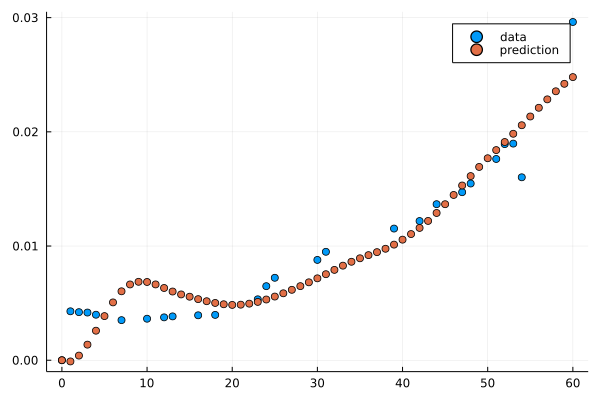

false

In [75]:
t4 = 60.0
prob_neuralode = NeuralODE(dudt2, (0.0,t4), Tsit5(), saveat = 0:t4)
result_neuralode5 = DiffEqFlux.sciml_train(loss_neuralode,
                                           #result_neuralode5.u,
                                           prob_neuralode.p,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)
callback(result_neuralode4.u,loss_neuralode(result_neuralode5.u)...;doplot=true)

0.1684641448688786

24.4663244590354

27.416966147434273

0.16701431305801567

0.13922859443033428

0.1754406220350408

0.25548367789830284

0.30442815108705595

0.32510818501183836

0.3023867879934447

0.23118731622950367

0.17096391999703536

0.1852372168042779

0.2416134569540766

0.2507604946158982

0.21035912070662255

0.1683352003670981

0.1550219980133385

0.16774571646229913

0.18205431576547587

0.1809790425579281

0.16588764318023683

0.147416871435939

0.1347847264684578

0.13079692104529372

0.13223639568951634

0.13466578024285653

0.13143101494672116

0.12476430756585097

0.11477587115054591

0.10417316177168086

0.09915751336926656

0.09458372278345951

0.09268753842074773

0.09162329675466302

0.08992537690596225

0.08766409644006798

0.08500184692614152

0.08158507779455579

0.07780928556604749

0.07288763775595658

0.06636753805254812

0.05859365906800393

0.04794797134212476

0.03723440873977984

0.04158831239077212

0.15555837262256683

0.20492712693704285

0.1895436082305258

0.14589350431282933

0.10642726329776221

0.0856385313144522

0.08232922426123988

0.08985660598457285

0.10300825693085472

0.11548266423165339

0.12168135901950113

0.11827241322153109

0.10716234096970044

0.09391960052982942

0.08284370555112405

0.07517038508181856

0.07049956350352116

0.06650630904763877

0.059759978296014676

0.04968463742526912

0.045968034361701736

0.050660146671349666

0.04422016200761813

0.03863541245916967

0.04107099018336238

0.031101832117736154

0.036366189326118285

0.02376240739267201

0.029303738968856276

0.018912521544840563

0.027420473624021887

0.03780955331162541

0.021779462000476747

0.08964171532674195

0.22951380598451243

0.310473477089961

0.2063538191133524

0.07054910888538532

0.03125891845093673

0.09153425433926976

0.13357534366300153

0.09435712615620676

0.06689402320097018

0.05801205246226413

0.05846229048768622

0.06369827633921925

0.06963997059594418

0.07443641401317633

0.07653311358490966

0.07602291203703002

0.07313070663195018

0.0705651351393194

0.06886309070500045

0.06779660001081791

0.06742215686584627

0.06749175498207859

0.06771695857148796

0.0674957455693719

0.06638107080791161

0.06420942603021908

0.06154835467285627

0.05867373509820122

0.05651523266371745

0.056313399836993974

0.05546351380606106

0.05359693584330397

0.0506544375186912

0.047820508771352854

0.045676696886814236

0.04418673572302843

0.04282012955430456

0.04110218698679133

0.03882052544702348

0.03629253991030865

0.03400632228378199

0.03214921118157537

0.03060120906672123

0.028730573033815328

0.026364233817140884

0.02418214176823283

0.022699426779806048

0.021313832595961268

0.019325690556315757

0.017384939522604982

0.016134292281004485

0.014849899294386168

0.013171955740078865

0.012112225780008142

0.011454011009289958

0.010072324407796648

0.00914102151611128

0.00840095136403924

0.0071974800624366305

0.0065439696819974405

0.005777773500587285

0.005036666338911305

0.0046844950096007806

0.003958860419020294

0.0038039166060554177

0.0033057922937480004

0.0028813684253047537

0.0029263860897596567

0.0023601067964638183

0.002281874252852914

0.0022505796394120432

0.0018796011679586295

0.0017307573788332218

0.0019110966240447396

0.002088880319724506

0.0018477355575520305

0.001488316663232346

0.001268420654526644

0.0012348831335182188

0.0013666065172911932

0.0016196512871846332

0.0022408106778276336

0.0027652950298929432

0.0033580360981828993

0.0024083588648661667

0.0014716594649993974

0.0010127862497987246

0.0015346674930080439

0.002409298906942103

0.001985855816151263

0.0012491662607840713

0.0010581390028168002

0.0015977194151671921

0.001805657735491148

0.0012068818510411958

0.0010819781417200937

0.0014267731104114635

0.001421321858166442

0.0011198007067506467

0.0010812301186848604

0.0011737750455104003

0.001178009377162202

0.0010116265374589546

0.0010315523505964586

0.001094131112152564

0.0011120181977792337

0.0009976636777479211

0.0010265022146323554

0.0011491582029327758

0.0011763719327345353

0.0010930721540691555

0.0010125370236227238

0.0010411562027384195

0.0012094238296899125

0.001273229121118687

0.0011855913741141135

0.0010475338586371885

0.0010159927200819269

0.0010953184642757065

0.0011327641084770265

0.0011269104562307776

0.0010903235443008629

0.001045153143995042

0.0010294169449703544

0.0010062236590023786

0.0010166353432241558

0.0009826004031008532

0.0009826240150335795

0.001024783813711536

0.001043322978339686

0.001031240682413928

0.001008286475222757

0.00100825286099826

0.000977668793945423

0.0009965727978941993

0.000981379935455025

0.0009966047958499566

0.001042189629582634

0.0011011904452684265

0.0011418537234461907

0.0010603454402839576

0.0009849032389922826

0.0010118595837930893

0.0011622627579457923

0.0014689596575242331

0.00174789815574594

0.0017440582778121107

0.0013591676994196295

0.0010313007616667644

0.0010064235298288197

0.0011158328855193455

0.0012191467913565475

0.0011606778096718783

0.0010119713677574256

0.0010096457838948973

0.001113891356962468

0.0011768334525650947

0.0011831716519862786

0.0010714854661862143

0.0009867322830391385

0.000993474136956794

0.0009986462638899268

0.0010214722082387676

0.0009845812633302756

0.0009770508041673366

0.0009756911919285636

0.0009799404397624746

0.0009834025446965686

0.0009651975979608899

0.0010253059480326361

0.0010241654140795645

0.0010709188034337524

0.001079613907381479

0.0010633894326818254

0.0010561389201547524

0.0010530231205411649

0.001019131383953026

0.0009875721109919148

0.0009679157538115423

0.0009918410086265515

0.0010018201044623334

0.000986991154608954

0.0009868197488364758

0.0009633325096676064

0.0009669677754589876

0.0009814652117451726

0.0009730258369383892

0.000982864415559785

0.0009791919495083616

0.0009748996808410315

0.0009846696051070067

0.0009907616270654184

0.0010720315257176415

0.0010788739704610936

0.0010769392733485606

0.001036826225910614

0.00101651775293282

0.0010090795031948959

0.0010010150784573186

0.0009816596259854334

0.0009778681591399965

0.0009659733528639966

0.0009734684181634725

0.0009760330094839279

0.001050627802190144

0.0011921501312699377

0.0013256870613493391

0.0013434402924448093

0.0014132763558044237

0.0013849142681580308

0.001411740753149006

0.001309192954397028

0.0012026446864530393

0.0011243498389600151

0.0010866037459142345

0.000985046611421092

0.000975691763434049

0.0009940787789373242

0.001077140642575772

0.0011577850956756648

0.0011813407586717872

0.0011605948730981585

0.001071097014281622

0.0010107602773447568

0.0009384255247764826

0.0009738881435361916

0.0010380835642231675

0.0011401796172808526

0.0012415804137550107

0.0012802177714342931

0.0013101013222533405

0.0012144570277127008

0.0010967169418201242

0.0010069430098177518

0.0009654258769330668

0.0010114919200438248

0.0011593401983310632

0.0013024250871509363

0.0014144571273948623

0.0014935616704765844

0.0014804325295784473

0.0014399954494016256

0.0013986908204715483

0.0013487155389873221

0.0011933387317586163

0.0010407597775887434

0.0009823042396920087

0.001032496761972499

0.0012233238319903916

0.0013920056688243973

0.0014880044621967503

0.0013340188600134237

0.0010995677370754433

0.0009663257516129553

0.0010738008701900257

0.0013265152705883149

0.0014821835430635054

0.0015338508026920634

0.0014887463136547476

0.001312630541222705

0.0010188792339747587

0.0009842197542574785

0.001173057817913688

0.001406455484301501

0.0015701058647610852

0.0013481903580816537

0.0010834812868937675

0.0009739212542885066

0.0010165883993740854

0.0011150693802425178

0.00120057711950588

0.0013070319634804744

0.0012667704537976747

0.0010823344684403565

0.0009553053929388208

0.0010191849324732696

0.0012092904797480653

0.0013262833712008426

0.0013945260974868

0.0012363636775783481

0.001076343245776033

0.0009841716604625712

0.000958570500048836

0.001010047980859403

0.0010768599536772538

0.0011154439599886778

0.0010805467337718666

0.0010195973984715116

0.0009646705021262345

0.0009671478130538827

0.0010139301911639253

0.0010326033969715307

0.0010722166702214911

0.0010824738896238082

0.0010767060771100763

0.0010207626326041283

0.0009731416937849356

0.0009680270704322258

0.0010611562267400193

0.001210832570584124

0.0014268183819390063

0.001677078127651002

0.001539951987904966

0.001414578144364503

0.0012755814718738577

0.0011011132847093775

0.0009921299396655203

0.0009742581492685529

0.0010615683499252575

0.0011465787578712257

0.00127740037814588

0.0012788938306711496

0.0011875280321148433

0.0010544339713036174

0.0009527576999614816

0.0009356676359368863

0.0009311225913866629

0.0009636123636442405

0.0009629599721645467

0.0009357606436623115

0.000974277329231306

0.0010114472359204394

0.001093466673286916

0.0012218127473932901

0.0013218867235116993

0.0014880632497785286

0.0016136317439594927

0.0018715085551615515

0.001780840688232759

0.0016409097317935735

0.00121470932683313

0.0009792734048546406

0.0010868957538395457

0.0014870339102283723

0.0020282582707477088

0.0019892992409858844

0.0016913515456939228

0.0012079584739005176

0.000980531777868462

0.0010815185755535476

0.0012513575467485623

0.0012309112574629987

0.0010529592858125267

0.0009685842826984115

0.0011235494476983885

0.0012792924366032737

0.001240624965236995

0.001106722940283086

0.0010104388005885525

0.0009519468018605196

0.0010672284496428955

0.001201643558913544

0.0012530447810090077

0.0012275679963099715

0.0011573136874234555

0.0010450376268632423

0.0009745570931163321

0.0009498732800721676

0.0009791517412641303

0.0010313039591512592

0.0010774946173922593

0.001016488588019373

0.0010029000942191396

0.0009405075875313041

0.0009640245209288856

0.001006777440332931

0.0011181463135643182

0.001161364655308592

0.0011082762331048619

0.0010721062088744915

0.0009647794225958683

0.0009652413660642021

0.0009991647764273886

0.0010758713980859663

0.001197880191077342

0.001336133917071133

0.0014029387228418184

0.0012339295816888754

0.0011222586005588452

0.0011106368347376986

0.001096061105533638

0.001037562393256496

0.000979905122124738

0.0009421058818231881

0.0009715312874427364

0.0010831499798720575

0.0012639078127204978

0.001592684437715876

0.0020290365775433887

0.0024529913887115073

0.0018192648940521733

0.001246711687822836

0.0009542684717957473

0.0011377052122190788

0.0013375544205309587

0.0012745193397342165

0.0011179950793176645

0.0009887019223443693

0.0009469181189067857

0.0009853954917070622

0.0010907338205443642

0.00116386870360622

0.0011560655609019464

0.0010156556468598208

0.0009396601709443648

0.0009613724343764632

0.0009903480026483744

0.0009999925783902258

0.0009787159050563573

0.000948277815998048

0.0009687621349524096

0.001063270575475916

0.0011672702730834345

0.0012969081299728652

0.0013802507436154524

0.0014782515884159968

0.001438388082417452

0.0013920193539930805

0.0012190396042631737

0.0010719756696952092

0.0009897675720133678

0.0009501115855793619

0.0009689222832075845

0.0009698338549540451

0.0009585943578592046

0.0009643365620575631

0.0009648303616219898

0.0009629114998754997

0.0009342118104611085

0.0009501709161595679

0.000997696667611315

0.001033196116628486

0.0010375803339443934

0.000987466574254424

0.0009791593187042345

0.0009143397250074568

0.0009057870470262704

0.0009345763431963729

0.0009329415693925167

0.0009141072137488898

0.000960227028858673

0.000995452237354654

0.0010785994567517059

0.0012972835604021429

0.0016503145138952397

0.0023121095947064236

0.002740402007197518

0.00360268329333203

0.002997668809187004

0.002431818620589772

0.0014170778598667278

0.0009944457235640256

0.0013873953837946588

0.0016676839324660112

0.0015121115755672362

0.0010725064244090333

0.0010742315845456729

0.0013965456438921704

0.0013730199865204869

0.001124408181664533

0.0009671761116544679

0.0010403166864834394

0.0011893101066588767

0.0011783850164533334

0.0010389290229008328

0.000941456479891106

0.0009871453927447799

0.0010319851768773028

0.0010812023633595025

0.0011130457073028276

0.0010264905205703894

0.0009530198075451674

0.0009714130507189225

0.000943417550660306

0.000950410866780575

0.0009748828487589441

0.0010136853647186716

0.001037122840485661

0.00106149339432436

0.0010616371554063367

0.0010612165712106402

0.0010310344780399313

0.0009915778916977128

0.0009306311711892318

0.0009298192226312715

0.000964373141282399

0.00094472394748404

0.0009378272069025767

0.0009367448842178695

0.0009273446395621966

0.0009312819284431722

0.0009322716934783951

0.0009290233848198748

0.0009260820811260633

0.0009397164068393782

0.0009606153906798135

0.0009430638083420253

0.0009297903720691101

0.0009217261097601646

0.0009487738367859932

0.0010174081725820858

0.001180594178678575

0.0014153348677110181

0.0018587544100628411

0.0022898117434856455

0.003209543373689645

0.0033431090990526068

0.0033364376538742736

0.002037653867206699

0.0011640274317619094

0.0010296416352031153

0.0014969895825744759

0.0017731541137564581

0.0012596853014938902

0.0010162016427872646

0.0012778447668940892

0.0014892766909081678

0.0013749877241331808

0.0009928045702280236

0.0010309907091951042

0.0013787135106541077

0.001527814152961816

0.0013909383209008011

0.0011277387216346792

0.000969597463928838

0.0009399714631762596

0.0010134974091317937

0.0011137232056682472

0.0012118307054994277

0.0013348185321912923

0.0013558747371435107

0.0013308177538533007

0.0011449453100450626

0.0009861505328050105

0.0009303160505922827

0.0009757115247590891

0.0010951069288501524

0.0011506597849579895

0.0011889109185515673

0.001113423094767935

0.0010247342118385341

0.0009023640106008796

0.0009528504563710503

0.0010731912103093474

0.001193791750780662

0.001231206677696133

0.0011861841600937077

0.001131223527004625

0.001049865033061695

0.0009405236945873562

0.0008988020508345113

0.0009413678646458792

0.000990708769535797

0.001028148685591998

0.0010717768758162491

0.001060249821119554

0.001031180169339558

0.0009751495163391637

0.0009286744263680237

0.0009222582842212284

0.0009201215519781269

0.0009291919045750843

0.0009132068605082857

0.0009080344088200543

0.0009014103903455282

0.0008983817211414126

0.0009084775900178244

0.000935721986371352

0.0009114562252670139

0.0009445342303929702

0.001025496929479151

0.0011314018339598

0.0011654100891917707

0.0012601227885598336

0.0013883237336806736

0.0016615069166692436

0.001854253123626325

0.002041300513778246

0.0018744432820677458

0.0016574519367799773

0.001268042339107456

0.0009960713096433514

0.0009394998635740955

0.0011471498485583352

0.0014029935824709842

0.001462631700174619

0.00145608767454265

0.0011264529381498725

0.0009353138837254202

0.0009369138206245352

0.0010582246427705293

0.001237407650659013

0.0013120552024658279

0.0013857542025706323

0.0013855416204662514

0.001517172536937529

0.001488101618277463

0.0014936261752247703

0.0012672744849135623

0.0010548300418617895

0.0009351598938761624

0.0009121356935294251

0.0009291628895137026

0.0009843254045457663

0.0010087712267000688

0.0010205477716623468

0.0010255239531856515

0.0010759106130991734

0.0011487402243538702

0.0012707673777048439

0.0015006265648810795

0.0015436622377098805

0.0015988708919020015

0.0015043420666305536

0.001535580345607685

0.0012991736295766406

0.0010927624351261254

0.000977780950706015

0.0009306637600600762

0.0009259612658832677

0.0009010052400865242

0.0008966481144433564

0.0008737724555187832

0.0008924002335503703

0.0009116388386455748

0.0009704571439011419

0.001130241648412279

0.00142222557911055

0.0016099792643518305

0.0018643050553618038

0.0019881026354116272

0.002142254240624271

0.0019976375596674196

0.0018751769337100096

0.0014690543800771321

0.0010669986475776905

0.0009529152916044543

0.0009787084363133156

0.001031231447125639

0.0010112270039246219

0.0009366152828731538

0.0008990082538861629

0.0009456059169159303

0.0011446292462909255

0.0012692166359637353

0.0013840751572734744

0.0013254667782708123

0.0012906412641241084

0.0012466811795374736

0.001194574748407241

0.0010928935808169858

0.0009798437990949538

0.0009031322574064831

0.0008882032488286204

0.0009324887723004795

0.000979751342472934

0.0009982355268231178

0.0009363485904338565

0.0008809877944316636

0.0009134690205386846

0.001038458607794266

0.0011998096118281734

0.0013031973026315325

0.0014099263720644408

0.0013457228699387716

0.0013639160857916244

0.001266031693723265

0.0012095769320147349

0.0010311117411001389

0.0009092979019906339

0.0008860815922640681

0.0009200280369169342

0.000995192126219294

0.001095751911755925

0.0011618754099401532

0.0011594647155931195

0.001145921623685924

0.0010734325302450163

0.0009986927300851885

0.000980488031864248

0.000951178249139183

0.0009643402435462662

0.0009707123139230616

0.0010062561006680833

0.0010553149947828688

0.0011028717852710644

0.0011497905984438925

0.0012505466389131467

0.0014583106901926452

0.0015065722763970327

0.001641242127920378

0.001690175983246805

0.0019163480798281083

0.001770269867687812

0.0016182689474216311

0.0013612259112072325

0.0010842122461204907

0.0009044853879564436

0.0010100938249010477

0.0011716002820945132

0.0012074191800162497

0.0011646177772698034

0.0010119548999877957

0.0009311078380694995

0.0008987881189617023

0.0009055910979407751

0.0009085237382462299

0.0009739292197822698

0.0010574142856912125

0.001235049676538548

0.0015139418140634664

0.0017098956209944424

0.0019418065011197264

0.0020106836762203316

0.0023741236935733703

0.002098986806699553

0.0019051394124267886

0.0013125299874220371

0.0009559711392979277

0.0010774740999373172

0.0013713988550479838

0.001525401844683244

0.0011860553307246147

0.0009241427631162513

0.0010192544183769028

0.00133693335625283

0.001702789094119778

0.001680937260694942

0.0015127852779029572

0.0012045566564716868

0.0009737028085379774

0.0008734126055436771

0.00096851918181894

0.0011162681540710997

0.0012307852560688177

0.0012818820083277229

0.0012064727967633204

0.001089391710415412

0.0009425421993001958

0.000886491262224737

0.0008853760213678248

0.0009868843264814096

0.0010445140363381723

0.0010441530320079587

0.0010259711579697329

0.0010280124374367075

0.0009768669297777067

0.0008918191379855603

0.0008772180668586163

0.0008589573665117611

0.0008920699701961433

0.0008814539283838563

0.0008739884345350152

0.0008756237405748074

0.0008842743860676371

0.0009085943271324673

0.0009127807413758047

0.0009040085047875793

0.0008641936032577982

0.0008648199260589662

0.0008818824376385319

0.0008811742801629921

0.000882161037966603

0.0009086897403871129

0.000999321668970438

0.0010637620470097281

0.0010705261827993154

0.0010499303992212803

0.0010430900036320382

0.0010524078192785565

0.0010268758749341473

0.001046403243105443

0.0011113829471734373

0.0012447330217897766

0.0015337114756301326

0.0019916423184628907

0.002834813925726083

0.0032584446519038197

0.003775950771878816

0.00240797640360721

0.0013915010488733655

0.0009751549719349606

0.0013669864447618063

0.0018959959608527473

0.0017272160141586375

0.0012796418566913212

0.000920997108094826

0.0010280146738386774

0.0015093871349694857

0.0018502680741632228

0.0019293404578891687

0.001635982216179539

0.0012638552592758822

0.0009853059807257724

0.0008794447568693631

0.0009332066431169796

0.0010794036549234519

0.0012941226090757447

0.001563935996768029

0.0018299575760785077

0.0017885314099508102

0.0015516274501501876

0.001146089538702812

0.000921872214646717

0.0009224162130196612

0.0010854237484603808

0.001236167288083965

0.0012817888505268905

0.0012494697851401606

0.0010561961517453074

0.0008900707537109029

0.000892072286336282

0.0010013532389345132

0.0011996125996817973

0.0015110759625871332

0.0018436556995926668

0.0019025520385848743

0.0021445507335496614

0.0020863589726678785

0.001954650225572788

0.0015031872925311452

0.0011679692530513913

0.0009242466315819673

0.0009797299046181867

0.0013948707274693464

0.0017245382001849947

0.0016586555371404538

0.0012461914183592335

0.0009025014821812906

0.0009339795788952485

0.0011177715899476

0.0013995946707640434

0.0016602458160424895

0.0018958638284888453

0.0019109553671163115

0.0016815145798190333

0.0012414979541711373

0.0009376848037128396

0.0008894876495761099

0.0011166243132484765

0.0014055029626580287

0.001475732093023506

0.0013605526473890297

0.0010411042205056816

0.0009064457620621754

0.0009460339453558227

0.0010841961992815586

0.0012745318179435974

0.0012806851375478676

0.001158577846664307

0.0009707834525234479

0.0008872353148022109

0.0008694870676020747

0.0009105527822477355

0.001106655442295387

0.0012970280224207074

0.0014472224862948475

0.0014234028937729266

0.0012899966484035028

0.0011074847745622556

0.001011804742930789

0.0009337002378422563

0.0008950259965453033

0.0008653592257576022

0.0008711738930259065

0.0008685201540697726

0.0009203720121647749

0.0009346651992952121

0.0008920159178810252

0.0009094017257478305

0.0008607149429011489

0.0009108378183306215

0.001057646956707993

0.0013443233729523154

0.0017961314167801693

0.0023093802023230717

0.0029387581827065665

0.0028507997002294146

0.0025036353981344774

0.0014830437713775108

0.0009416975770420246

0.0010814560335880518

0.001482233760050905

0.0016623268601864724

0.0012384113996848512

0.0009019730608429597

0.0009579152296359012

0.0010912388611965763

0.0012828801181332993

0.0014504834682561572

0.0014905377494536477

0.0013475299630437056

0.0011629051826229648

0.0009738010031858474

0.0008622133463902675

0.0008922857967337499

0.0010591080519848938

0.0011985202659467913

0.001297920397150609

0.0013591861243242383

0.0012616764395257769

0.0010861071379704413

0.0008923323362503709

0.0009355143580314616

0.0011291045620387054

0.0012731339344484764

0.0012623150968139574

0.0010729692353663727

0.0009330376670020611

0.0008515397854399638

0.0008857890532164669

0.0009438047874041647

0.001088546512739639

0.0012834162035491223

0.0012988646781031089

0.0012720700221829483

0.0012231640583037595

0.0011622769616597326

0.0011377551738805097

0.0011838745812107424

0.0008515397854399638

0.0008515397854399638

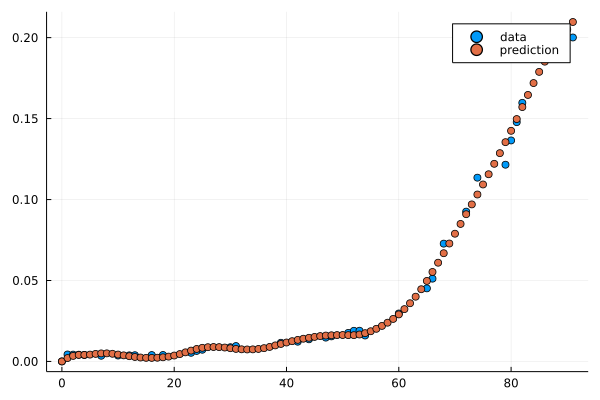

false

In [77]:
t5 = 91.0
prob_neuralode = NeuralODE(dudt2, (0.0,t5), Tsit5(), saveat = 0:t5)
result_neuralode6 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode5.u,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)
callback(result_neuralode6.u,loss_neuralode(result_neuralode6.u)...;doplot=true)

In [88]:
writedlm("NeuralODE_first92.txt",predict_neuralode(result_neuralode6.u)[1,:])

0.06319094185349064

0.3558759924848418

0.26198815356651695

0.22072261955174785

0.18163658921404463

0.21329465702787942

0.20330241045623618

0.1890389967530451

0.1803720115588877

0.17691067478615127

0.17682519494788343

0.13561795738053894

1.9398392286667328

0.19020796984585303

0.2282431822164484

0.26659230498081077

0.2806180632038102

0.26436288549029746

0.24401593305132438

0.21683061388286162

0.19679469257226265

0.19133993356979165

0.196358016981379

0.20646301950531423

0.21637911299703055

0.2205537288896856

0.2151577433939737

0.20546712669504907

0.19814517097670223

0.19521056829407848

0.19666613691712534

0.200590348503998

0.20414648078214562

0.20324841417082043

0.1982182247355066

0.19193206792116455

0.18865767768361094

0.18758965796674645

0.1875437013091991

0.18740370477596335

0.1870186992228794

0.18637302542683798

0.18591093064610098

0.1852824432486241

0.1846929633079649

0.1841200689716178

0.18346576308756773

0.18282974541488908

0.18209801490175065

0.18115151145158673

0.18007704936073748

0.17881885929071067

0.1776139136709059

0.17627346101547087

0.17493300568086223

0.17370953428299363

0.17114380449137143

0.17032817274986833

0.1694217231249781

0.16720199445049652

0.1635119147327785

0.15913361473476828

0.15535145849648213

0.1507087201113355

0.14626207876192823

0.14018513101115782

0.13250391207832643

0.1222978696133417

0.10886084576650351

0.09121051093306681

0.07541059686348413

0.08400972139306707

0.3140955448652873

0.2391977889089378

0.3344065826217678

0.33917985639455706

0.29178348239764507

0.23126699946765006

0.18880838455926252

0.17314332420878

0.17960385825351122

0.19736145238733502

0.21548035330713455

0.2273259963674626

0.23420993018121705

0.23576292427053974

0.23259175062274692

0.2260037002893914

0.21695262510539776

0.2070352690977566

0.1975076250234012

0.18944123190113302

0.18356077596487846

0.18103793186262024

0.1804376646103206

0.181393356547583

0.18324051427577742

0.1851806314614929

0.1863363804484362

0.18693471375497542

0.18652016997702445

0.18532794425616303

0.183798060052667

0.18228479203891182

0.18107603015815552

0.18032170487049493

0.17966149019146962

0.17923605781835925

0.17887277663050685

0.17884735999681042

0.17922866699954965

0.179398238546954

0.17920612995656388

0.17858951451454455

0.17794212856914332

0.17688003624571091

0.1756803111354307

0.17482579661135836

0.17414969097539776

0.1735963427977449

0.1732738037336116

0.17274122057640443

0.17211641518820028

0.1714377676491637

0.17065730869356582

0.16975923334350698

0.16876018049690045

0.16771896682369086

0.166581302145091

0.16522812432991527

0.16364981181478008

0.16197520074190722

0.16009176487379537

0.1578571864398144

0.15581928533090633

0.1530093162279712

0.15000526202414993

0.14679173745504995

0.14583383832234625

0.14233851730908892

0.13861436281443124

0.13414123555671725

0.1311108626727744

0.12820622386948752

0.11825987186528389

0.11617731909664991

0.10592597409542864

0.09854930887631876

0.08804032940682875

0.07611971876106738

0.06317134400545922

0.053857581931555064

0.04702397606597067

0.05906367080264694

0.03590932025146106

0.03273533441535545

0.07322012190711046

0.22023174817384214

0.38211005071824006

0.6698201411930167

0.23027955300751282

0.31442424848577044

0.25069875269743697

0.16882784993937625

0.4092634265086846

0.3138188386356175

0.12867089843673682

0.14762171660101553

0.16883847192266793

0.1870421015868298

0.1978448818280562

0.19954940574892643

0.1940166083261879

0.183069101506376

0.17973870954341267

0.18321720776470535

0.18610925881133658

0.1845171921846822

0.1766930688269091

0.1713820357464773

0.16935069029920002

0.16807865713974435

0.16749483609793991

0.16717709857156063

0.1661820458686513

0.1649362037274907

0.16404602243178346

0.1629799945946885

0.16151335835364888

0.1598753317707302

0.15872371167776783

0.15781449411423237

0.1565651250209593

0.15514097949617742

0.15369575947202574

0.15241662418272992

0.15100084626752833

0.14934352311120647

0.14740281476808717

0.14522918072824922

0.14311133945063184

0.14084985452046858

0.13830899988493806

0.13538219440791693

0.13172556555563353

0.12789410381115424

0.12540247315811437

0.12242713486950096

0.11898203108880119

0.11511631953969235

0.11072148801752406

0.10576016734370534

0.10045488042468302

0.09612637690801264

0.09203627401804232

0.08730732053626301

0.0822083004720571

0.0770323353821133

0.07149289118975366

0.06595134981841141

0.06080922640955024

0.05579087332217548

0.0510839649949875

0.047708430991522735

0.04549298466655439

0.04438650517380327

0.04437960450321229

0.04462563182827984

0.04521355738885917

0.050819764723783474

0.08276446847594983

0.13511117212026305

0.07726437846936286

0.0425959704341509

0.0786412367796616

0.03833438230581023

0.05764307807449629

0.04534218275869297

0.04602960669594828

0.053708263688064195

0.04508432310067686

0.046244377538126005

0.0512288774179652

0.04664844323577972

0.044485178582860885

0.04692353257530127

0.04358396662477434

0.03804878738907341

0.03858672310150251

0.03569269100827836

0.03265480955828236

0.03535387724509323

0.030953036860084875

0.03450587415001397

0.031246279866757685

0.03499018256206787

0.03147214118222319

0.03386899077126335

0.03116370854036293

0.03177239721213168

0.03039722966966721

0.03057332102793235

0.029884644899275378

0.030519837022920368

0.029654576020265506

0.030417068154613425

0.02941891169984192

0.029958480432140104

0.029250976240241037

0.029270638785970082

0.02881763148991999

0.02857439530074452

0.02864713683340018

0.028452565496708944

0.028739381181497013

0.028408250227598374

0.028599739604444854

0.028097070007617304

0.028273119683682516

0.027744753886401338

0.027937534279526013

0.02762838552551542

0.027803301712156142

0.027595815141286725

0.027654468312074427

0.027500559759220986

0.027599061399833615

0.027407359549890438

0.027349221003696543

0.0272960283394712

0.027232491467234946

0.027198654679478042

0.027170815747936613

0.027119529729983605

0.027072882660101008

0.02700236348680972

0.026980893844173518

0.0268969472317196

0.02687413873276335

0.0268314788154937

0.026803715517481945

0.02675970945820525

0.02671445283955011

0.02668972110691377

0.026624539473599163

0.026581733788051058

0.02653102353760465

0.026514203872582562

0.026483775131148114

0.026431648130480045

0.02637458786854173

0.02633854297584857

0.02630792285308399

0.02626338313492719

0.026239201880195524

0.026179263334821422

0.026122965718902956

0.026068757702807414

0.026094471497142523

0.026043207877754382

0.02599762878643478

0.025972575633543805

0.02593534153308508

0.025900183591781954

0.025851342425672004

0.025787053391476338

0.02577602282165921

0.02575473063103627

0.02570708093797326

0.025669006222155108

0.025638506818215046

0.025607944652473902

0.025561768767189033

0.0255462772689009

0.025485805712189346

0.02547182403212757

0.02542691731513337

0.02538871632539153

0.025345170457560354

0.025305342868414862

0.025294791769489216

0.025263407174936674

0.025218322246336005

0.025197208286385935

0.025162107446184863

0.025110373320776855

0.02508209495988801

0.025042937108414175

0.02499293142408292

0.024972119921532344

0.02494017822644789

0.024880744823185807

0.024891064800230782

0.024854125043140968

0.024806420513833187

0.024801306154491623

0.02471358106674118

0.024696720990712188

0.02464524254575906

0.024637484286797066

0.024614427256403268

0.024579146807233786

0.024537509018524466

0.024523645136116906

0.024477729809032945

0.024461972102439472

0.024442709069443583

0.024377671013947423

0.02434039518215031

0.02431741085047709

0.02428058506353513

0.02424321013502961

0.024183110660811205

0.024165373142519878

0.024157604080263472

0.024127530006333792

0.024075853566786102

0.024045222513141222

0.024007697395665342

0.023982915897152096

0.02395476931840646

0.023906618321355114

0.023881515307366544

0.023853143230541156

0.023821855052297884

0.02379994242046578

0.023746454983413372

0.023725430013621814

0.023672559686587297

0.02366553621122036

0.023710889779991313

0.023575777499850167

0.023563460536903176

0.02351182504596733

0.023471254366930764

0.023452429690817275

0.02343714681470837

0.023410372383764096

0.02335399550485466

0.023351675084769524

0.02329283089881229

0.023305999200613846

0.023234852208428365

0.02322577947855435

0.02316263891479866

0.023162988623331007

0.02312757280291277

0.02305033024633091

0.023048181444840273

0.02302513702184501

0.02298418093483104

0.022946227881700414

0.023016348701973284

0.022883754131385024

0.02283708500694139

0.022840317922953005

0.02281430485049857

0.02282715386755963

0.022738978705804578

0.022639011583627237

0.02263734469059471

0.02260893412729249

0.022620902794763725

0.0225498644278949

0.02266574901213235

0.022489633541004552

0.022436155977709066

0.022438543868464444

0.02242106564133839

0.022237173404290097

0.022372218529420472

0.022337887658435897

0.021929496492771674

0.02227270224807054

0.02199980047555633

0.02205472928495266

0.022163802195488164

0.02217923568229297

0.022138003223142376

0.02206023268122509

0.021974076564744913

0.02193842958108487

0.021950623514848375

0.021840765917221866

0.02184347618544303

0.021820151254408764

0.021754633379331062

0.021698729075918834

0.02172422373344292

0.021652208557325046

0.02149771971361856

0.02148469745006298

0.02144075127886052

0.021381525347014492

0.0213275116147795

0.021228003510165534

0.021203502669882253

0.021128272461105387

0.021110240867427993

0.021073891987464823

0.021006178817894447

0.02099343521177241

0.02093872904215691

0.020885846794359272

0.020832877881324062

0.020807046522915987

0.02078571327267148

0.02074376931151771

0.020668535866143194

0.02060160985249867

0.020593681681823503

0.020565414744657118

0.020525526583876103

0.02047051964406773

0.020420934213425217

0.020385200870906055

0.02033897401645226

0.020337940615098075

0.02025987163151703

0.020254762468433822

0.020235703773939

0.020170554772567507

0.02017200386394241

0.020137681091688415

0.020115206325943623

0.020079597347275206

0.020053380762366412

0.020015146767329087

0.020002374782092

0.019940912112494373

0.01999364248622135

0.020037871121888654

0.020206343652768095

0.020670862838494532

0.021101640527258644

0.023163787715806905

0.023153835956319604

0.027175356900031627

0.022279190149243816

0.020534010282798755

0.019919049504782155

0.021039832232800613

0.02367268647138252

0.022285799001666617

0.022796008221525083

0.02090526288770822

0.020223192103184073

0.01965758734460734

0.019601814034359604

0.019989908218678708

0.020372689345880643

0.021706609039799644

0.022080542457255027

0.026581665260967682

0.023256521732978597

0.024205454730031897

0.020312022890056423

0.020151796217416595

0.022448509429699687

0.021383307965236124

0.021116323449985614

0.019859037257936148

0.01930718193441977

0.019102191443125888

0.019315454156856485

0.019817758822127225

0.02018006502316206

0.021199720597488033

0.02073986510620056

0.021362659310605266

0.020392805895223465

0.020466257713949824

0.019694188752415406

0.019368625962551424

0.018990338524331945

0.018826562366560523

0.018808636066346883

0.01899639167492437

0.019490219111304226

0.01991497197977357

0.021586556335491662

0.021314626091568985

0.0235129091981787

0.021080754177459075

0.020635202181919245

0.019173509607804434

0.018632954686523845

0.018612726578101348

0.018886409491293756

0.019776288996219686

0.02024649406048495

0.022232872955037376

0.020560446278925462

0.020133014298304053

0.018863411241626424

0.018480997825641575

0.018855813156791693

0.019697792578447094

0.023213921251081245

0.02483044902225346

0.040423721452520385

0.019658507010976222

0.03820086652100228

0.07083799018838391

0.05409646852924943

0.04280586960757975

0.0700240258060923

0.0403079234100185

0.07434552753835144

0.03757829198044336

0.05915479900879996

0.02697467171445693

0.043050875689158094

0.025913043446146478

0.05814900932086584

0.0740609866506762

0.0731324266628666

0.03450979199093154

0.09283790216284742

0.03789568591592933

0.06903623746494633

0.0650635013606652

0.03656545873946069

0.06450961836092657

0.03381988354779344

0.038654312681300054

0.04146407087513318

0.031559568769625304

0.019526569965735693

0.028819187123944726

0.020416183345027178

0.022414970141867715

0.02755879397651434

0.0193134727980696

0.029686790469029424

0.02531827274908388

0.027134566660639993

0.02265990512172355

0.026361446157029407

0.02384582027914471

0.025198537960197304

0.02103819584356363

0.021573154750462

0.025062951002019107

0.020547510793486365

0.028629988473311007

0.024458021675750355

0.023255858478308834

0.02412390143332841

0.019238501057877007

0.022778657669777408

0.019604599100558787

0.02238636998512986

0.018605135020868746

0.02095820680184949

0.018562959735606545

0.020695075757113934

0.02094185801414235

0.019103239846335676

0.022447364956630113

0.020191307074892903

0.019613282311768933

0.02104129082827273

0.018242706961021957

0.019890508460114593

0.018308996100657053

0.01938075222812671

0.018688040227040383

0.018712857368253996

0.01868428543462519

0.01788007359219425

0.018562358156898093

0.01771098695623764

0.018411382700498902

0.018318977533469637

0.017827478451513296

0.018647979336811428

0.01792414669925346

0.017918815867303373

0.018085744730799172

0.017430234214400937

0.017701512284054054

0.017293999487608513

0.0173794570635911

0.01735987260223762

0.017117863781407696

0.017386343240376752

0.017130231426814958

0.01704235009238811

0.01709442139002673

0.016850069467975667

0.016800338410482438

0.016950321597063604

0.01669074860961927

0.016580614137952705

0.01669779957449922

0.016549566308469536

0.016370990913119155

0.01645528920019281

0.016409253600175654

0.016163414396354832

0.01619906913279965

0.01625249790979317

0.016022155463818553

0.016028006490274627

0.015832078652086724

0.015556225096430915

0.01496600356508913

0.014749701571700972

0.014904266102846474

0.01617781788521416

0.017068607663213282

0.02257003701037922

0.01769646899256482

0.019085544795080872

0.016053897201556276

0.016066657940842145

0.0144006855831759

0.014776645924914792

0.016170461642959724

0.02608400453327426

0.01842065713165164

0.023741206086133084

0.014855350754058545

0.013297014407273511

0.012204988596959048

0.012222736758766912

0.013486864821097854

0.02181551596063267

0.025280210932578952

0.053666535588780435

0.019373524231579

0.1649798897747355

0.1361662647251824

0.22600445757405815

0.09051096325370353

0.0669667205962

0.23175536640335356

0.08635901783720622

0.08858570652365133

0.11081336233123944

0.11364326718427158

0.10233158978601738

0.12077455408087288

0.11526763442096277

0.11646075825756065

0.09340411011180365

0.10156190961670901

0.09802799737689899

0.08735585981810905

0.08665230781372046

0.08733636174837114

0.07453412142903883

0.0691493540680746

0.06702303572572808

0.05486610591880003

0.04489790631965905

0.040451673079782584

0.029359295193616377

0.02989074872838

0.031035469599014265

0.024428262449731314

0.030015965256859692

0.029902530048591724

0.027714913314939527

0.03047303788195089

0.024374961028069513

0.026827126413311475

0.021547765841237083

0.023296582401259792

0.022126492064201867

0.02312124135860833

0.024318218122024338

0.023111666520867297

0.023517679645123437

0.022497328843787478

0.021259792327901254

0.021430370356709957

0.02008326037948831

0.02051613494689164

0.019584284874719922

0.020433984196261506

0.01961975382273003

0.020227293634357154

0.019462988900496088

0.019700840178648614

0.018913743864366152

0.019015965430680556

0.01849665559880237

0.018559348054144224

0.01835826983904969

0.018331712578936163

0.018265675257143198

0.01783045410360944

0.017732679065958074

0.0173252015579742

0.017430362710334837

0.017175995987012714

0.017184777288622367

0.016913237409581162

0.016834514605104448

0.016527088819791348

0.01639171581003153

0.015902848034924033

0.015391177104838939

0.014438100980049965

0.013608658869549308

0.01338801610380947

0.013402094854686634

0.012768498460039884

0.011641266560125551

0.011235966657614109

0.011391927321852197

0.01188454680761212

0.014117878280965408

0.01872313053189787

0.039172947307787025

0.008796282611072712

0.06794278663720657

0.10734677592453401

0.1332659881523817

0.08386587462269098

0.074065686987636

0.10692700538952656

0.11582929287247791

0.08496772345789316

0.06592596852874494

0.07015113081960171

0.06561747136244007

0.0241821196730471

0.09921267178397834

0.02899747412236351

0.0700815039822484

0.035292075404018027

0.04192327731930625

0.028755699258023272

0.02877661315018597

0.04097822630079358

0.028843833069142906

0.025303805402089617

0.038046630765629974

0.022864900088924042

0.028132611037681235

0.030174038905731247

0.020844879333644855

0.02604619294794559

0.02296229939281114

0.02060576373278624

0.025160769335888976

0.01804507148201675

0.02354022153498435

0.017713770459913174

0.01993326255125316

0.01941514339203384

0.016762383897421494

0.019735044091863243

0.016424870227459976

0.01885878995923812

0.016805778910567955

0.017142967784617207

0.01703302777211564

0.016137846506260815

0.016970007481895952

0.015042703880382114

0.016450259295231574

0.014581836176058688

0.015726161538882323

0.014628426757636875

0.015498674554487803

0.014504521444934559

0.014912277703812505

0.014215358314664538

0.014489214104163772

0.013839529987786078

0.014102574331753923

0.013472499548305466

0.01386040550998964

0.012984578779680133

0.013241580383372368

0.012586028140424987

0.012744714121010582

0.012347566959557316

0.01221356392260996

0.012277611433311176

0.0117596211074899

0.01200422247086703

0.011596277280990979

0.011405245274399855

0.011353263925948199

0.011065750728688465

0.011064170643849352

0.010866577443391241

0.010590298032956368

0.010577716081497712

0.01030234294409203

0.01008788814559491

0.01021666667177245

0.010198277864469396

0.009596290963297241

0.009284533003787728

0.009240213116409345

0.009123909404046754

0.008826987510561018

0.008238810713931536

0.007746438446406981

0.007279483316861011

0.007266832081339826

0.008707617660802268

0.019865059922529966

0.02061817569217073

0.042565403277125005

0.014947884492438532

0.13548811651484088

0.045497886998544255

0.06769433948386008

0.00889205239015894

0.04966604724161614

0.031425139796485285

0.04133094443989726

0.011328374322829593

0.04876566039744707

0.019224505583919166

0.03773721093683265

0.02293342733113757

0.022372298649073828

0.026197599337539693

0.017423978482977668

0.027049609826103264

0.015229840465617749

0.021587363321672545

0.013504699569871976

0.017128230516083722

0.017009252280529172

0.011952691187224961

0.01641753394628065

0.012954903168804372

0.015608014390141207

0.008824351426950178

0.01548294543721834

0.010289879585466184

0.013262388946433893

0.008152387618419436

0.010003525592167188

0.009690685874835594

0.006891529446435606

0.011759412126687

0.005194096597810254

0.008287139923378432

0.007178008385083332

0.0046681566642533335

0.008036675970945173

0.00465066784451745

0.00539600728453608

0.0073470571620559925

0.0043082829857999695

0.004483228767459198

0.006373195513319204

0.0044909951509719374

0.003413401619491845

0.004925334538707353

0.0052270615219826184

0.0036751048011888447

0.0029817574580224106

0.003844642154187219

0.00450423414814416

0.0038801918387835234

0.0029595623772700457

0.0026119299016910307

0.0027587516633281483

0.0030705447238704307

0.0031564278059899625

0.0030264030702895116

0.0026032414603463054

0.0022528197056263222

0.002172245441453708

0.002257971668972433

0.0023563566938337287

0.0025277357192374584

0.0026751815815120902

0.003039061231647203

0.003364909172487276

0.003804074843682439

0.003712845430766363

0.0033404260375668616

0.0027718441349728748

0.0022258465200691155

0.0018688454242806241

0.0017802122825389707

0.0018635663748024322

0.002022318303494018

0.0022423355771286706

0.002320543951752679

0.002461797658522732

0.0025183891363204955

0.0026738494318048777

0.0026108071311228853

0.0024759842904978633

0.0021983138082835277

0.0019634486171382563

0.0017208745774266003

0.0016115901533729129

0.0015470252946550998

0.0015350571490627195

0.0015337094072165247

0.0015206519423479523

0.0015153216983340486

0.0015367413094002796

0.0016314637260474816

0.0017242044261780616

0.0018040029588986307

0.001937645089100461

0.0022240824008086654

0.002815520520394361

0.00420986040587373

0.006446471885265338

0.012151215374671575

0.014004489669801707

0.019879382017879074

0.01007055649371629

0.0029071472884116974

0.002871584489305623

0.007392490590061957

0.009222475441559401

0.00290756622223223

0.0029408384232517655

0.007114294010718643

0.005287590950968133

0.002087879681219459

0.002720911080901267

0.005389829718555044

0.006457336133414884

0.003249774748090106

0.0017458965848266153

0.003240675884120002

0.0043626719194897745

0.003300299182923834

0.0016564088713187815

0.002169040267925802

0.0032544447030895714

0.0030195944725666273

0.0015153216983340486

0.0015153216983340486

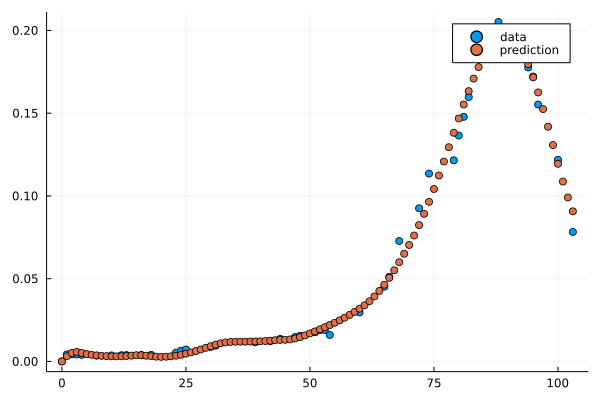

false

In [89]:
t6 = 103.0
prob_neuralode = NeuralODE(dudt2, (0.0,t6), Tsit5(), saveat = 0:t6)
result_neuralode7 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode6.u,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)
callback(result_neuralode7.u,loss_neuralode(result_neuralode7.u)...;doplot=true)

0.08006861119703745

0.39553649846337885

0.3296518714530585

0.2672674874902984

0.22972181988670076

0.20700989527284336

0.2109023891495877

0.22210382710398457

0.2271883235636388

0.2257260227481955

0.22007158345507127

0.21262564022774572

0.2125415216403726

0.20752335735735572

0.20940281041593567

0.20839265517283118

0.20514753969863503

0.20267825234127124

0.2001989079306561

0.19912166104711138

0.19871531670342754

0.1989505364101915

0.19854971575892152

0.19720741672276115

0.19694467159868706

0.19599212868866467

0.19441689692924136

0.19237157711549513

0.19037290753319863

0.18912355015879634

0.18764685110156834

0.18614013615774017

0.18459500220754793

0.18330278963939606

0.1810748351683041

0.17866215328408275

0.17572417109619137

0.17194782311450496

0.16886182434263963

0.1634743521253104

0.15726278257023046

0.14983232032217786

0.14102291203331457

0.1344041999578429

0.14426773195467427

0.13474593376692257

0.6021140135017917

0.17396110140053422

0.22697808631188787

0.22962801994984122

0.20664297692301414

0.1861303771050465

0.17941928201942017

0.18010949628502132

0.1819712815195419

0.17791786396696735

0.20481621547576911

0.2029070805189812

0.19314909328048321

0.1767924903509343

0.1814912565873505

0.18350721917866358

0.18556561607156327

0.18718464648012478

0.1869886247616935

0.18443009082662448

0.1803677976179638

0.17583330105730147

0.1720314602586867

0.16864199591093426

0.1644175071588009

0.1577042294472269

0.14995148634849448

0.1497524424412906

0.14666201448413974

0.1424697653052918

0.1324669817107797

0.13740356985255597

0.13944375830226044

0.12426955776566564

0.13645211489273767

0.12589424559802456

0.13133626773147278

0.12534059304018028

0.12238720191456265

0.13732792377216313

0.12520385227988567

0.13590425922386767

0.13946979042416113

0.13080444808589411

0.11633747817611029

0.16195784444846922

0.15151233456403243

0.1768548160906772

0.1687588860732474

0.1615841227951205

0.17591091217072863

0.18209829575930842

0.1714118012708895

0.16462629933226952

0.17357728459072336

0.17418320747143382

0.16163262689359273

0.15861449074535905

0.16176204195728883

0.15739916719650954

0.14979077751940673

0.1516641689490521

0.15282634464915218

0.1482497028410671

0.1439880860611233

0.14407766385289306

0.1402253398094928

0.14005123382028606

0.14070166171638837

0.13874268507709717

0.1409903827964605

0.1386571904583072

0.1402937747724443

0.13802578417737693

0.13822070580483092

0.13716049580763645

0.1356663970474805

0.13571038629812798

0.13479218469942209

0.13390788659159092

0.13350885390635223

0.13338290367757058

0.13315889802796999

0.13279911368747183

0.13238169096071184

0.1319539781460122

0.13126544224645847

0.1307856613603462

0.1302383805669856

0.1297060320650744

0.12909679182880063

0.1284795941372444

0.12774202334951

0.1269833133029873

0.12594085868352978

0.1254886503426339

0.12472454921817863

0.12407452085446805

0.12318045915448504

0.12292153643322468

0.12178359815143398

0.12139947596348521

0.12044020468860969

0.11951378109962213

0.11899008647043147

0.11797894217693564

0.11745163654485231

0.11670486271419958

0.11593593771617189

0.11545586546275152

0.11475590482584655

0.11435757372074792

0.11376759042142592

0.11336743662796236

0.11297782380353202

0.11242235648637086

0.1121909305329448

0.11180549049702607

0.11147814926527969

0.11107297446470482

0.11081752953142106

0.11048165765901627

0.1101129959582577

0.1098702617733638

0.10946292150535408

0.10908180806628402

0.1088239463248011

0.10843579723161356

0.108111723930566

0.10780862887110215

0.10752092286675044

0.10723958227101517

0.10686353233148474

0.10661627121609211

0.10632954576894285

0.10607217902336034

0.105839894818134

0.10548224654946961

0.10524928790456808

0.1049868461620353

0.1048002052401786

0.10463265868788384

0.10446073082927053

0.10424483269917485

0.10405239003625497

0.10381573309359474

0.10363238814485293

0.10342201213226439

0.10323882195120004

0.10305753689948645

0.10288220859519474

0.10274323692800003

0.10254899515326357

0.1024039754321838

0.10219933650434379

0.10204572884249541

0.101879611357025

0.10169411688258025

0.10158251220811054

0.10137343614449391

0.10121398925378336

0.10107907947273963

0.10092210208404714

0.1007833937159523

0.10063008352419747

0.10052194679730703

0.10035640715895908

0.10022379488514592

0.10009666010945079

0.09998961371204022

0.09986608335281377

0.09974911951344018

0.09964154807464287

0.09950414723358857

0.0993438760368833

0.09928767657680028

0.09918556592024905

0.09904455013058684

0.09886431760665379

0.0987462553512495

0.09861151649319519

0.09848501996150302

0.09833589479448049

0.09823303171142245

0.09814358977768725

0.09800224100316249

0.0978824117145217

0.09775116404424461

0.09773126424026941

0.09760966489161628

0.09746639096790222

0.09735594794747351

0.09732676306918231

0.09740576052934409

0.09753799410654446

0.0972690799951122

0.09701712454284746

0.09685084292839968

0.0968027633414363

0.0969768505728388

0.0971188522453798

0.09762355457290894

0.09747030723474884

0.09880409363578552

0.09725521397732126

0.09687587871812267

0.09628196684872278

0.09615780225090409

0.09650950506626987

0.09690404962836743

0.09878013076745033

0.09722684480520814

0.09710823492955205

0.09593381844145174

0.09547278491752163

0.09515941514300154

0.09502102325886373

0.09515357266919769

0.09534340383902726

0.096481316879632

0.09619320198667185

0.09846724432337545

0.0961522236209143

0.09689895957613082

0.09521143649773472

0.09486143325884672

0.094215547405895

0.0939162392052918

0.09371859710198821

0.09355401682729772

0.09350106236405312

0.09359408528132834

0.0944172496612808

0.09611908888505591

0.10568781482376363

0.09421181591698934

0.16923889075248472

0.2392973663967599

0.2750006772538761

0.2282010907472844

0.17981669042042775

0.1966343217463441

0.24861557926051508

0.2426589536357126

0.20744854554419945

0.18742324183506248

0.2022585730430399

0.22201759616767602

0.22273463243556016

0.20756735111310387

0.19421345305356294

0.19429676013723463

0.20327240088369924

0.20999762718706172

0.2081891692738711

0.20055463561467757

0.1943591995390359

0.19392864479362623

0.1977090505321738

0.20119646054870266

0.20084361533531986

0.19701800732786395

0.1932320537211835

0.19188783524745578

0.1934851526417204

0.19553576350801338

0.1954109966734846

0.19326083079614745

0.190655958246655

0.18959035305152394

0.19024230374027645

0.19098944539247925

0.1906711688098827

0.1890877585576416

0.187528165522064

0.18691204935352004

0.1869950185790961

0.1865703638226557

0.1853289461915248

0.1840038314143111

0.18330527210064482

0.18305609078140084

0.1828703494082525

0.18204374491884134

0.18063571360527295

0.1793444203332323

0.17855200334046403

0.17796151739427055

0.17684107143675523

0.17537342128950015

0.17398642455915161

0.17290992470907315

0.17168270006313985

0.17014375640219565

0.16844763636039206

0.166593501530354

0.16460777828900267

0.16203699456844856

0.15927139478684027

0.15618415611094183

0.15248404427761153

0.14797909169901208

0.14233612276425556

0.1342240111527705

0.12402500015187527

0.12794330879525564

0.1874684921061192

0.13059144416577562

0.10894279284004355

0.13660681311049838

0.175164803582201

0.11992202929574895

0.10395097096520726

0.172475330560244

0.2764586408607246

0.13561884726325235

0.18769166240905205

0.21912293531586197

0.16175171949575143

0.14258333708523263

0.1813523698950985

0.17931364477392084

0.15486408005870161

0.14493689515907832

0.16097513579884917

0.17116379722274172

0.1521068606795723

0.13956212603257503

0.14738002549622323

0.1545227546657448

0.1481379957008232

0.1339713317655198

0.1266001235695976

0.1375379293167322

0.1262612437554233

0.11730656877496952

0.12113305270844392

0.1192390946285041

0.10678458300714552

0.1397440541566222

0.14927779349117704

0.17551407956037732

0.13141177378555202

0.11940598458823673

0.1557269587238861

0.13691495944841137

0.12394522840776054

0.12729821850013096

0.13318891198285646

0.12355698761788841

0.10306908613856909

0.1387269247803118

0.10763357860011999

0.12888545508521093

0.12454000693146897

0.10908491521211133

0.11032154707531588

0.1276822687501366

0.1066484048088093

0.11220008915557408

0.11926454619164557

0.11362941470652815

0.10193537816376086

0.11127164705781957

0.1030576220081057

0.10143342568941413

0.10852788110254527

0.10280200191279609

0.09769450689583069

0.10614772054162483

0.09666353992727214

0.10342719144235249

0.096525631701955

0.0972393071644267

0.09340118655485463

0.09390479981875081

0.09334598614155443

0.08746648779209926

0.091988671003431

0.09158903003873706

0.08853743151811425

0.09002880157649323

0.08093148373370335

0.08391352046784134

0.07553128493005433

0.0773143209444734

0.07186472645669965

0.060012239561055204

0.0656667749954764

0.07841349867978481

0.07158684179797635

0.07852454247054096

0.06322804161582347

0.05842724352001108

0.04233136852863818

0.070500534847653

0.04200465872436106

0.04470431934073167

0.032071658125269215

0.040153375206619615

0.018713357295351347

0.0167418495501475

0.06802667522837741

0.028862190855381678

0.027545170227017222

0.03397668924419576

0.010362343926690599

0.02365283623073906

0.014689766596654417

0.01873244621313849

0.015616586348585614

0.011033511130780712

0.008111051863558325

0.0062892540959718244

0.005507783579948277

0.005080442646157476

0.005982235232741205

0.004681956852712673

0.0034622119087857144

0.0031831793008075294

0.003940528644219123

0.00829391173320295

0.034292015902665826

0.1257439090667321

0.028164205151438037

0.00991597593798526

0.04189705107460913

0.0058740619671324365

0.027914259101727835

0.006634613002467758

0.02192728848910032

0.011515529057102267

0.01494711819819909

0.020222913831431058

0.010618939446747914

0.014311174868546626

0.014332433786747159

0.006342701716465414

0.012205585709813853

0.005776428263654673

0.007436799948053918

0.006011105354568454

0.00660063708646512

0.0037875357600057327

0.006354111011327721

0.003945830603804944

0.0066765043668159

0.001794208707146428

0.0057646454042409425

0.0027171088478637083

0.0034242715618101587

0.0034991451851284546

0.001980999053192811

0.0036623822484124656

0.0015848893899153352

0.003469023793698449

0.0020967278642195315

0.0023189077134833543

0.0026433232252587417

0.0015505984128711802

0.0023930229565912627

0.0014794018352288876

0.002109014369313581

0.0020921429847596948

0.00145452588213273

0.0017992966812921925

0.00136614564291505

0.0016511687512524905

0.00135446900054246

0.0015240361577132818

0.0014396506947835963

0.0014067768091745177

0.0016081267571030687

0.001187420294574268

0.0013218282162312444

0.0013129947704069527

0.0012346046863625669

0.0012829057392665278

0.0011345569299604152

0.00119776252809564

0.0011070174200660155

0.0011804836873916926

0.0012352182371424421

0.001074170660400056

0.001242256311890384

0.0011331293683548701

0.0010817589008336897

0.0013032543580100728

0.0011056865865542746

0.0010629558863790697

0.0011448926670687672

0.0010304987546490298

0.0009460078000615903

0.001031602328975303

0.0009274895436073694

0.0011193333123605811

0.0010701628500303104

0.0009439818035636218

0.0010765854885019799

0.0009095578903738717

0.0009830626664834837

0.0010057702850869812

0.0009285889741844406

0.0009445036652606843

0.0010023252738243327

0.0008886873624017746

0.0012122060367080992

0.001117847529780703

0.0009138368726085481

0.0011751427793029853

0.0010506159588361838

0.0009598304023166044

0.0009727340370765779

0.0009485545558598703

0.0008612926768202494

0.0009087796691874911

0.0008263233304279222

0.0007874537543174513

0.000823276666573486

0.0008063726455512681

0.0008213947153047423

0.000786338666696242

0.0007578015604590983

0.0007932063096066668

0.0007990484928837316

0.0007787819728476237

0.0007962234379073626

0.0007351875369564798

0.0008194052939223387

0.0007316858175734553

0.0007582447984645731

0.0007456820706448563

0.0007617377848337907

0.0007617129407419382

0.0006909475882603443

0.0008019088266421261

0.0006901457962597436

0.000797357041547669

0.0007054950958323898

0.0007155687570002975

0.0007786509853324707

0.0008043397608794689

0.0008182645215687422

0.0006608758346802842

0.0008347451238111406

0.0009061002362557916

0.0007516470093298543

0.0007053692789095996

0.0006877703786044967

0.0007321234971860285

0.0007330920001535339

0.0009693617819637788

0.0009756000583100848

0.0006557100519387837

0.0008309390402633462

0.0007810639739510143

0.0007302742817422772

0.0006886619733493542

0.0007257956793636269

0.0007153529980362186

0.0007048297021161869

0.0006925957903040555

0.0006239382676508013

0.0008295851237270937

0.0007780083094771873

0.0006197987148527857

0.0007624383072407422

0.0007364766868999434

0.0006104357585705823

0.0007490913809564886

0.0007047623501999603

0.0006019030146741978

0.0007255649612276499

0.000690699892282122

0.0005918453788679991

0.0008748308873896751

0.0007365208854183072

0.0005740362329976782

0.000795455888464663

0.0008569004021013011

0.0006914289017820997

0.0005793432466791699

0.000678982868996541

0.000688056290694765

0.0005569885424268246

0.0007804791678218872

0.0007795214661876642

0.0006151152225484707

0.0005921500859569441

0.0008201443611436652

0.0006760420374812212

0.0005273491585429352

0.0006224276236233442

0.0006806981289962741

0.0006230884087211413

0.000514391511519511

0.0005778662608416669

0.0006705026540665586

0.0005690982449188726

0.0005130935076350677

0.0005871123845921493

0.0006042282556013758

0.00059873822740967

0.0005378089949342507

0.0005145625707514153

0.0005827270640025706

0.0005537839512262667

0.0005010685953158074

0.00051788297783165

0.0005351336963436361

0.0005283358080070402

0.0004815837904047531

0.0004777677619095304

0.0004947210974959756

0.0005228443640264624

0.0004989813699752938

0.0004804538484721149

0.0005408745816657544

0.0005483970447777349

0.0005001237767701309

0.00048128511267852365

0.0004976827565515698

0.0005490240594373951

0.0005467467614712282

0.0005156171595214678

0.00047976179025055183

0.0004648452673992863

0.0004605171497966305

0.00046532787303884334

0.0004580663645696198

0.00047839384614697185

0.0004537029352132012

0.000477215996289775

0.0004625903585771966

0.0004591889731086158

0.0004440111140997744

0.0004563887587151689

0.0005041940110060458

0.0005445308727050758

0.0005306895701574837

0.00046562269022014136

0.0004604918626744376

0.00048042136483874046

0.00046803741016700944

0.0004580942147186229

0.0004409751799039728

0.0005370530324358672

0.0006449657003255924

0.000712808891199519

0.0007836154759342479

0.000689255554152208

0.0004923767750896675

0.0004318702865365907

0.0006098807396474312

0.0008512464025541217

0.0008090608752334345

0.0007563965885825459

0.0005613514924654121

0.0004286584661360233

0.00046666238286251417

0.0006014102765629098

0.0006911443158392444

0.0005436962160833881

0.00042164547193102205

0.00047574097985302787

0.0006750258332251388

0.0008765586532446303

0.0006688635577130301

0.0004776532555197893

0.000418867206724405

0.0004139417071726284

0.0004044239160032637

0.00040792761929490874

0.0004075338714673907

0.00044535709958233127

0.00042323367282334594

0.0004009212932087462

0.00042505686352739704

0.00040760792998639707

0.0004008682224766635

0.0004140936043736865

0.00041334033048126605

0.0003904313693967328

0.0003905199317864271

0.00041279932718832455

0.00042613126142199647

0.0003935022820879183

0.00040777852732345413

0.00044429880749955266

0.0004323005795179315

0.0004767430611923631

0.0005454127558184852

0.0005525845539727564

0.0005165475259363047

0.0004536372925335609

0.0004405155152210461

0.00048498086568790887

0.0005188978632288038

0.00048696352678303135

0.0005070483268187322

0.0005381428793484286

0.0006593305632855607

0.0006526587470209401

0.0006980686073227631

0.0006847978349969392

0.0008129782533222516

0.000731048308670429

0.0007856408863013732

0.0005802890889075496

0.0003812948580570586

0.00048266477518912307

0.0008013834491384802

0.0009831350072755968

0.0008140070128361716

0.0006615524296314762

0.0005529778620425685

0.0004905540679914139

0.00041935406103454757

0.0003743881722124912

0.0003694241804619329

0.00037994728419441133

0.000404603669426763

0.000387887744530742

0.0003786814132979374

0.00038670797771040013

0.0004027995071971068

0.0004108434255079898

0.0003856249580974462

0.0003604457236519008

0.0003780771453330749

0.00044000122722700666

0.0005358799706197798

0.0005779089049782649

0.0005738072308343746

0.0006427406767986941

0.0006509306203271575

0.0006548276342824757

0.0005411397984238693

0.00041914998356361863

0.00037162878502671154

0.0003763887815415053

0.0003534811079702785

0.0003717401296120059

0.00040213651759637043

0.0004510652157043685

0.0006386457960036775

0.0011747838312338313

0.001492473528724981

0.002028660262215278

0.001516160835900228

0.001186154131846088

0.0006088871336252947

0.0003789403830367755

0.0003936915453933308

0.0004776485278740059

0.0005770081902091301

0.0006282921717692853

0.0008169855145722567

0.0008425589592468471

0.0007486071238358193

0.0005399566684550565

0.0003928620105896183

0.0003841043384767024

0.0004248467866836929

0.000470046441802362

0.00044996316349538737

0.00046592300585027624

0.0004408301355645278

0.00045704900227216424

0.0004564676066973115

0.0006639509759075568

0.0006849287561450532

0.0006110330061763901

0.00038086822246964744

0.00044198363552626997

0.0007106432652865627

0.0010582798145518163

0.0012112436887550771

0.0008043323946787032

0.0005554783676789612

0.0003922922982444756

0.0003589541136866797

0.0003765868704015574

0.00041237425275036455

0.00040213050763141433

0.0003403715741445079

0.00042605911325005143

0.0004349491152200363

0.000563626037403412

0.0007185098221992064

0.000730795664914263

0.0005530514273058021

0.0003766347725581028

0.0004360290755462432

0.0005434512206273657

0.0009512939672090678

0.0017329403519862206

0.002198213390289484

0.002920034305799849

0.0021910246515677223

0.001331289430763244

0.00044201175784757085

0.0005898951046759198

0.0013430616717453434

0.0014404269738877802

0.0010639848612354315

0.00046377030313552033

0.0003778473221012938

0.000605481935620073

0.0007320288659223229

0.0006550319790681898

0.0004357069797106939

0.00035620001510898

0.0005194243480761665

0.000711121394551666

0.000756728986702145

0.0006345697891966455

0.0004732723695646488

0.0003400033598579093

0.00042448624248986474

0.0007338094630223357

0.0009000293715789821

0.0007523323471093777

0.00035480969402919185

0.0005223118399636615

0.0010186447530601353

0.0010215318633635649

0.000733120840383425

0.0004200219574149466

0.00034223444788721664

0.0004955521328985921

0.0005393536241633163

0.0006715443483993101

0.0004497120670678552

0.00045026072975338594

0.000326669718299548

0.0004870622036665128

0.00039614657484592693

0.00040564680301007674

0.0003226523553269896

0.0003696158132479613

0.0003215146789134043

0.0003769000188780649

0.00031970407871668896

0.0003426716189958845

0.0003297582750137537

0.00031988442624731353

0.00032921304994986664

0.0003790064228838995

0.0004772645059213952

0.0005796697591718247

0.0005791567870820571

0.0004632801373739341

0.0003739673858270539

0.0003297661977193716

0.0003194056367401826

0.00030898752951695366

0.00032502362734775753

0.0003313991303733579

0.0005146588540178736

0.00079913622906694

0.0012467919366022447

0.0013659940592438125

0.0014111380831669578

0.0009013169871608952

0.0004485292906336603

0.0003702700276085567

0.0008644601840280407

0.001370379096529191

0.0010203955488886783

0.0006064718015060789

0.0003175813318128673

0.0004398004794676446

0.0006565723375010661

0.000720465234555418

0.0005927955054303483

0.0003673314040511078

0.00031354389769973004

0.000386761080288304

0.0004808914910992944

0.0005979598213039629

0.0006681269397565658

0.0005034454087010332

0.00032085947326389807

0.00037486847685462663

0.0004442565089358523

0.0004198749843130485

0.0003585018170791538

0.0003379562047026018

0.000378368211983319

0.0004656148509885709

0.0006728208719004685

0.0008168995450315495

0.0006516193734964939

0.00042582298503369607

0.0003088341311529636

0.00044226882744625306

0.000707372207565576

0.0009737583839807866

0.0009338244308084742

0.0005337246537750354

0.0003644494203419233

0.0005483068385013062

0.0005858860812450766

0.0004187556509566702

0.0003827631606812892

0.00035765599043548473

0.00046293063133524836

0.0005876697944442435

0.0006272452399649756

0.0005927330896871042

0.0004986842934567329

0.0004762031964997262

0.00041947534002818724

0.0003822692885537605

0.00031993676484905263

0.00031389777086911186

0.0004174075228658482

0.0005605785701807977

0.0009997804100601712

0.00223856199745603

0.003070501427240535

0.005395318510123752

0.0014483206846995231

0.001015482570830951

0.0037196333727152375

0.004175940945684103

0.002359454500655533

0.0004154121850141305

0.0023686940885530015

0.004761179411970463

0.002863383599612001

0.0004881856208978625

0.001863732496144928

0.0017658218289844175

0.0012235621798473558

0.0005156655445503452

0.0021520271550935673

0.0031425102280557594

0.0015886465067513707

0.0004909635640869348

0.0017390522192765089

0.0019248640788259246

0.0018350766420774367

0.0007660740303455319

0.0008031884867627306

0.0017630147069400777

0.0013585259622602651

0.0008265855897848626

0.00033228546080329513

0.0007690590386152999

0.0013281905968883178

0.0018496470259210724

0.003067203591085973

0.0003088341311529636

0.0003088341311529636

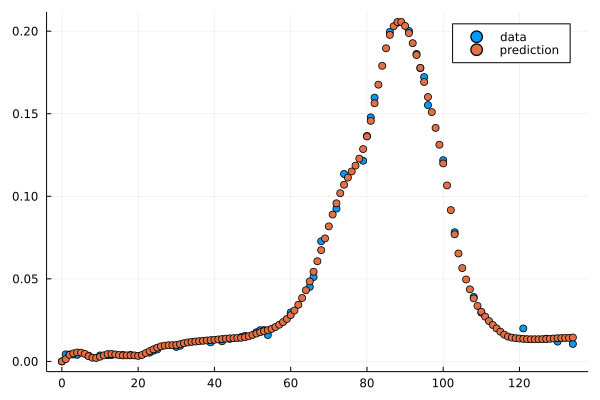

0.7403502558139257

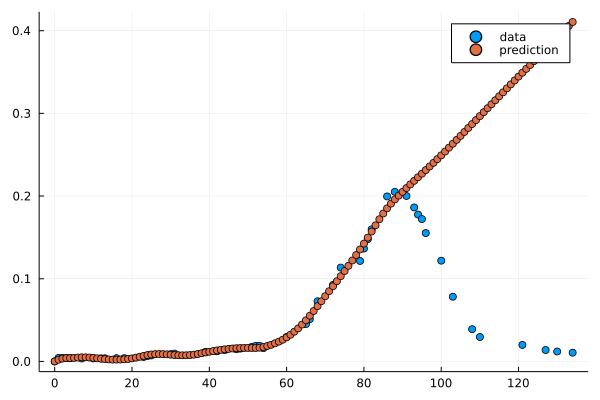

false

In [90]:
t7 = 134.0
prob_neuralode = NeuralODE(dudt2, (0.0,t7), Tsit5(), saveat = 0:t7)
result_neuralode8 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode7.u,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)
callback(result_neuralode8.u,loss_neuralode(result_neuralode8.u)...;doplot=true)callback(result_neuralode8.u,loss_neuralode(result_neuralode8.u)...;doplot=true)

0.0016512926388730074

0.1031097173526945

0.2730588646506163

0.11855798798065068

0.11207471216898218

0.12057233913108276

0.04514953423946239

0.025771779113442382

0.02043652546235683

0.01757264836043704

0.01068494475212559

0.027720784918552493

0.016401037448735153

0.024863239790456928

0.029994500656846373

0.014838372482837238

0.02557739941819518

0.01406628743280582

0.01709854194003996

0.01416460951260815

0.00613402435763369

0.010177527902003705

0.0015621422377300744

0.00806915096476695

0.002410229832440209

0.009443936099475494

0.004254566972896935

0.008599834978413302

0.0038753164657137624

0.006582380842612342

0.0027674692314016407

0.004738060092322661

0.0017881236728084613

0.0034723159473454344

0.0016812889904656066

0.003312536205552024

0.0017202523433064985

0.003796845973828833

0.002096283977640028

0.00383279554140297

0.0018126284060130493

0.003296917723318756

0.0014126307825973023

0.0025250031937367667

0.001138697497102413

0.0020898846043061635

0.0010728992051399736

0.0017864695434115683

0.0014269383870640585

0.0013151110230602326

0.0016406197785720123

0.0012178592383302646

0.001891412629973431

0.0010299320832848097

0.0018045969322111866

0.0009856785740432826

0.001442363678259441

0.0011983789354044277

0.001033583693862221

0.00158044296054369

0.0007736650978388503

0.0013468421968638195

0.0009360122573598042

0.001129905112264767

0.0012367113784536557

0.0007683341841155772

0.0012135713737012068

0.0009929872330799673

0.0007660466897447336

0.0010944140400054167

0.0007106536736362851

0.0008880844327358458

0.0010179793833698006

0.0006951239404376312

0.0008578097059412359

0.0008216601886927126

0.0006768749078844455

0.0007871562597220865

0.0007880818250104412

0.0006267887639268918

0.0008036117211910317

0.0008389710586148932

0.0007186333532400234

0.0006289566501069205

0.0006739539155147665

0.0007098324521049158

0.0006812320854386805

0.0006338099398886995

0.000673720029575213

0.0007372594264612822

0.000710842908392771

0.0006351273442195444

0.0006105979232790641

0.0006012714394382548

0.0006109358794461104

0.0006153603387832235

0.0005978910596464741

0.0006889140250302473

0.000746384087213091

0.0006672696697987104

0.0005745508423646859

0.0006830370845384918

0.0007390695236457529

0.0006724030908628147

0.000581556173765495

0.000674486094985021

0.0007332134597025452

0.0006725469140105218

0.0005828267911309334

0.0006378057164969836

0.0007148017524538235

0.0007166215508710528

0.0006522244921673952

0.0005641089819482374

0.0006285728937323852

0.0007425112166776048

0.0008667868195208696

0.0008690180225628806

0.0007405644900325186

0.0005677450415748801

0.0006677649000874009

0.0008831303746245269

0.0009895153762305689

0.0009335063856469783

0.0008385486231583576

0.0006651942793273499

0.0005587150866259514

0.000679796617709964

0.0008740156749502075

0.0012369939744396297

0.00176575478940443

0.001970547514098935

0.0019240790656525329

0.0013974983440124152

0.0007626290489045879

0.000561325676567305

0.0008208730962216567

0.0013026910335928452

0.001500306884201151

0.0015882599376268534

0.0015055302265501315

0.0010503392591612063

0.0006908922119059136

0.0005649865683055428

0.0008683892599641886

0.0013090241222840136

0.001277018834377475

0.0008433332674542267

0.0005630098325751769

0.0006010676469422114

0.0007977379430120879

0.0009644625858614458

0.0010389459157752231

0.001298481447294201

0.0012957096474889003

0.0011621750611456017

0.0010299229831838659

0.0008171913713531969

0.0006282777672536708

0.0005527959459446705

0.0006019412627433674

0.0008244887662143788

0.001146037110660648

0.0013259381901366077

0.0013594496380720164

0.0017063518584902405

0.001337064910850014

0.001016861918253808

0.0008883711025381948

0.0007076284105672312

0.0006033360585133533

0.0005709881673100942

0.0005826067026894958

0.0005899828513775082

0.0007873323427168861

0.0011656326192598344

0.001677897954854846

0.0020975431399374227

0.002385892491157732

0.003120834169479338

0.00396915212731205

0.003635027479922905

0.0024209284081396277

0.0010973557781635732

0.0005546817534250536

0.0013190027568562473

0.0031738485825474

0.0032278348767396207

0.0020139432055741304

0.0007860727598671117

0.0006586830141675168

0.0012086523732538369

0.0013863833404594054

0.0009133391096732393

0.0005925024776594658

0.0012087477043859064

0.0019020547041462793

0.0017383293813473637

0.0010792969555185965

0.0005650048720489056

0.0009002839253670742

0.0013640541470030714

0.001400658067729528

0.0009493332443145608

0.0006276796122641903

0.0005640990701716363

0.0007114494998631506

0.0008870101748745086

0.0010361985218008197

0.0010910321526785326

0.0010840357756092918

0.0010898192063424344

0.001040768836615106

0.0009650364501319598

0.0007952021542096913

0.0006087317826895546

0.0005317318340145612

0.0006235552129823011

0.0008372089842254593

0.0011807543774638497

0.0013657375769873352

0.0015366101509393095

0.0013617766069026018

0.0011564550289641792

0.0009598993880373011

0.0007890394722223781

0.0006619828584342863

0.0005956972971778193

0.0005974516518079564

0.0006852115426650646

0.0009094160840192885

0.0014346994446328809

0.0017753263662943248

0.0021503586321078077

0.002501853269050447

0.002503838328716602

0.002017193774047405

0.0015075692863196384

0.0010862019722525978

0.0007258352431649637

0.0005529613592979363

0.0005773321183030903

0.0006204144414261937

0.0006291748212601764

0.0006217749312467226

0.0005556043603331826

0.000529011614204266

0.0005299075348404094

0.0005451840121793339

0.0005443728001094286

0.0005330981582643516

0.0006314367904829143

0.0007926053437095539

0.0011056715066968359

0.0013051100896885274

0.0012944184274903325

0.0012127942588304444

0.0010822085215092764

0.0011759516744948505

0.0014016287397449181

0.002247451031250911

0.0032897786313138932

0.004181924356081055

0.0038195608970163267

0.002171088239890749

0.0007540050197878623

0.0006439591231266722

0.001390212137913772

0.0024726574778366206

0.0030631310744353994

0.0022046193076955527

0.0006614506911571804

0.001278610762799445

0.0032099352639787956

0.0038931233588780268

0.0023178274157367048

0.0007115485268320768

0.0010968358504942653

0.002555105178007648

0.0027136259696928303

0.0012387372549617869

0.0005858638937322461

0.0011263224996293259

0.0017385801342322137

0.001098328321893495

0.0005813095246873291

0.0011034426154828566

0.0016801765118169062

0.0015095306128527562

0.000853225364570297

0.0005547123574298666

0.0006960548331213279

0.0009268509673374782

0.0007044069926371413

0.0005495364460772705

0.0006696318591347677

0.0008041414269587533

0.0006657579893461529

0.0005313680206474238

0.0005547158106102432

0.0005390542062410604

0.0005346437353639499

0.0007531256562678973

0.0012261569660473421

0.0015647865333236284

0.00130962262779614

0.0007898967121932708

0.0005155502584460739

0.0006101603135361251

0.0007901289262399559

0.0006168660712767689

0.000503517985412059

0.0006454145480289282

0.0009936607751208698

0.001269173309667717

0.0014690900022503012

0.0015145901731072732

0.001392299796670977

0.001273682425667578

0.0010401482958318131

0.0007435779468046708

0.0005190915901585958

0.0004999561336230175

0.0005603092398975792

0.000692064438419983

0.0008101630589539108

0.001159557414794188

0.0014371126310500065

0.0015189069012260749

0.0014460047654022512

0.001101086739869079

0.0008094079573684005

0.0006135617181998105

0.0005040256759637064

0.0006392932562482672

0.0011362810131152687

0.001989099221310005

0.0019461897670559126

0.0019187117954034489

0.001467904947025052

0.0011895610377207115

0.0007167416501618339

0.0005090855917198574

0.0008340188514702143

0.0014510966410229262

0.0023397176549442406

0.0019565150657489825

0.001365107299518828

0.0007491776654040148

0.0005010261555914238

0.0007985049288170436

0.0014526052209970727

0.002009984149128167

0.0015109807703113712

0.0007269901618180265

0.0005274639971515517

0.0011483599900562465

0.0020101460379885446

0.00315229017982501

0.003917516052745314

0.0019786787796735915

0.0006865517750362149

0.0006877669834368141

0.0013066893682359938

0.0013296281143267978

0.0009080930143880675

0.0005913861134931919

0.0005146381219407715

0.0007802448643965383

0.0009232705258014281

0.0006276016859104818

0.0005021495843064582

0.0006525713808851585

0.0008363612656814885

0.000876567910746315

0.0006898256178994983

0.0005199012419191064

0.00048811021300161747

0.0005279295832578609

0.0005761270892928425

0.000577570089604796

0.0005589405343272444

0.000552684936354849

0.0005386221320832016

0.0005212326729583231

0.0005020213255706199

0.00048012272401827815

0.00047696978279768913

0.0004765988022556868

0.00046345100437325396

0.0004684472600252547

0.0004676306583655323

0.0004941751081521914

0.0005829365692431539

0.0006599501337113851

0.0006896818785542807

0.0006201483036406402

0.0005244727534681415

0.0004769995793760621

0.00046698376699612744

0.0007368908598591583

0.0013199801154803357

0.0021859802074645674

0.0025602163831914037

0.002765202130802687

0.001736642212883785

0.000822419760122373

0.0005213690857925493

0.0005238682136257509

0.0006923193692876869

0.0010051451445364248

0.001302196808496533

0.0013868645372232392

0.0008878634746705986

0.0005004694679829019

0.0005184006431799427

0.0006933299173475224

0.001034283833389754

0.0017392708737230215

0.0023768041346736934

0.002813067538851879

0.0022137277158705685

0.0010474629578052328

0.0005210569701940303

0.0006488169702825952

0.001027103711224404

0.001192377635737555

0.0009755640551756489

0.0006229323623235091

0.00047902836279019735

0.0006187160910190427

0.0006597683527992033

0.0005846205102882692

0.000651408412704177

0.000648728436165742

0.0006448068428254942

0.0005989182044872029

0.0005561497479415708

0.00048003431891490496

0.00045514461399650684

0.0004891015727717836

0.0005696769039601785

0.0006197121471175828

0.0005997759195522077

0.000531342488582286

0.0004767886691955633

0.0004602869379045704

0.0004870872633328088

0.0004993635914830579

0.0005289503853053036

0.0005454226887911276

0.0005555656034135173

0.0005208512621178179

0.00047934405392079826

0.0004798951374063335

0.0005382576831774523

0.0005714611170722754

0.0005916438459706778

0.000576089521463474

0.0006307267724179273

0.0009454227005496697

0.0017946498255702692

0.0037791671029492597

0.004714447062285879

0.0030510416740680444

0.0013546675434815568

0.0005689438713933004

0.0006943035354710494

0.0015051952292789935

0.0018068643494692858

0.0016701579363721302

0.0010999715733373459

0.0006856364699448683

0.0005214613832204942

0.0005026677329129091

0.000461066064168509

0.000451463514264378

0.0005021794320157192

0.0008471224239652668

0.0017539759253965466

0.0026656670702636157

0.0022542001028357963

0.0011756999307204886

0.00046959582424333337

0.0007632347558854574

0.0018072802510601604

0.0025811682474666344

0.002673959689585365

0.002120651027984979

0.0012770949254975272

0.0005429316233446723

0.00070475136447125

0.0017116479971807908

0.002446248982160711

0.002218956535723431

0.0011668496964319216

0.0004769720335865938

0.0009500543696034432

0.0015373688940609933

0.0013452754901173336

0.0005940597372792124

0.0006879204137138835

0.0020682894148108975

0.0020985246007762088

0.0012748571446048323

0.00044260152301773013

0.0015496146506908577

0.0027273601714216627

0.0022818666914945674

0.0008818063223695465

0.0006964340520770663

0.0012482216753414816

0.0015382950013655592

0.000719456984944263

0.0005467149281597448

0.0009174715574319269

0.0009477484742819915

0.0005962861847423522

0.0005588251058455912

0.000977025873868999

0.0007745120484213303

0.0005259333336314545

0.0007135872638080269

0.001516765487944072

0.0013806400429404906

0.0009531187173969219

0.0005581088428143478

0.0005835891733203493

0.0010181040264564615

0.0010577957253072223

0.0009071190012193038

0.00046424620865521656

0.0006568190514994142

0.001220225532414031

0.001612934795677834

0.0017079552639069208

0.0007373403983409624

0.0005637992672617331

0.001271812318678121

0.0016350980907634336

0.0014044280699702972

0.0006299771139691146

0.0005099241088160688

0.0010981715345068765

0.0011943431528827545

0.0006778667390329315

0.0004565178108676924

0.000991702235289003

0.001556560511191805

0.001717875301737836

0.0016695480201908831

0.00099361359868877

0.00045216889527096237

0.0006344625454586275

0.0006191504974361558

0.0006546303150615047

0.0004985422591267125

0.0005271775765988988

0.0004340348984787146

0.0004998084655973341

0.0005294965098285369

0.0006178181940571936

0.0006670272129570319

0.0006343461109205477

0.0004917797070153433

0.00041210200515588334

0.0005086142053790474

0.0007332473598704982

0.0008874704225183396

0.0008023979029249698

0.0006061422480463909

0.00041943364423558776

0.00044445409590946326

0.00048187541511207117

0.0005676583756284982

0.0005905882221405279

0.0004405180950809521

0.0005739518760937989

0.001481000506385289

0.002733046487171757

0.002977664490206397

0.0023349754867853403

0.0008646668400695573

0.0004566346148991568

0.0011847833213037074

0.0018186197995330774

0.0018059632632698673

0.0008525771702931672

0.0004124523270566223

0.00055822616856677

0.000573340004762853

0.0005062829310565943

0.00048060314074607345

0.00042632237670394134

0.00042054568705207927

0.0004675198892147886

0.00045758789787258175

0.0004977353857482648

0.000452851130894705

0.00037598407061727944

0.0006189647668166197

0.0006879621021461219

0.0007568033565306106

0.000515118437014

0.00047507993279497456

0.0006857191550112363

0.0009986346529364696

0.0008164649277358333

0.0005228022672994136

0.0004994677514629512

0.0005604592233055018

0.0007574172228736252

0.0010490433512726242

0.0014161277916188014

0.0014561006800702294

0.0011906992556541757

0.0010200065002737328

0.0004955926412802324

0.0007296913223189705

0.0005754651357875321

0.0009351345612708268

0.0009113026059593674

0.0007204636134498294

0.0005402696005104476

0.0005189874563555681

0.0008111465793016327

0.0008628452051438835

0.0009410865480627943

0.0006843794865987788

0.0004484214710259905

0.00046884035293054985

0.0005818336766283654

0.0008267458977632399

0.0009827094954012597

0.0011188971266305082

0.001524049199105964

0.00180636125447589

0.0014655675547612153

0.0010571264137838293

0.0005752383155773234

0.00039232199073606063

0.0005827979976155788

0.0010180716023843151

0.001540171440220482

0.0018731613447578166

0.0018060578367508932

0.0010477637302144193

0.00043767567793315287

0.0004904787529923076

0.0008893231718946729

0.0009359776394146911

0.0007153272101019963

0.00047892812931696956

0.00040108329194287346

0.0004113537340152796

0.00045770365116119387

0.0005481821035512541

0.0006000358136302683

0.0005967156488980764

0.000526621099704922

0.0005260230853293588

0.0005810183047920195

0.0006515929827303941

0.0005504033958796616

0.00042376004397836264

0.0003913574378270599

0.00045651243330802765

0.0005727236847209188

0.0007162706226890632

0.0009912921760791699

0.0009759560940155206

0.000698260663460437

0.000530687843366346

0.00037761142920235267

0.00039319372584661406

0.0003932832220018497

0.00039531898800979754

0.00045300903368196063

0.0008322922483336861

0.0012439357713737813

0.001646906593620532

0.0014550323378848162

0.0011349933192718498

0.0007204228410372178

0.00039541699052369605

0.0005325060142039723

0.0009308347469195783

0.0010543954024446244

0.0008149611219676209

0.0005684929938726348

0.0004205171608717185

0.0004318465237907971

0.0006053436275031712

0.0011750885418076093

0.001679644752574346

0.0012363423525512114

0.0009865373163900767

0.0005906531694841462

0.00044638041507769386

0.00040845159360703397

0.00042888907994909054

0.0004448289607419474

0.00040792920164866724

0.00046851951384993274

0.0005144866421249646

0.0005406598637348117

0.0006459640438825907

0.0008338451711353127

0.0012444012917859916

0.0015661431608291062

0.001986429360767515

0.001744172880116543

0.0009531526386267933

0.0004360621449041273

0.0005529162491483621

0.0011773496506255067

0.0015432663971345693

0.0014431224154833344

0.0012180437150787118

0.0007986085352133878

0.00045694123131529915

0.0005092174826696866

0.0007430143261618081

0.0010274997467045648

0.0008068607668352513

0.00046963401704715836

0.0004005912504591276

0.000474903388135536

0.0005234732865090149

0.0005477779077438152

0.0005542900763437524

0.00045616577781577784

0.000390848647265807

0.00042435048474651364

0.0006850138425103482

0.0009913128898722053

0.0011073034189729542

0.00115442235100922

0.0011602308923272216

0.0010972019961862445

0.0009020165326199833

0.0006445412253939048

0.0005017771337334124

0.00043093165867677595

0.0004017405969857053

0.0003872632780779742

0.00037399512323774516

0.0003807043909245197

0.00037873791384503407

0.0004103742932321775

0.0004842401841043689

0.0005165637214005747

0.0005957212771606887

0.0007604928390179382

0.0010505154854380918

0.0016041032909267666

0.0016943801234965735

0.0019018308748923892

0.0014681949040226275

0.0009588913583275142

0.0005548291305936541

0.0003994956560405013

0.0004532681734586251

0.0005987632894542725

0.000650681534870932

0.0006535853210858058

0.0005885441544997398

0.0004235199328324967

0.0005349099238706053

0.0004404078484722894

0.0006582495186556215

0.0005772165310504265

0.0005232352298839193

0.0006056979068046228

0.0005003943904949897

0.001007141138911892

0.0013385219312808522

0.0018310482602190274

0.002406338747913572

0.0022165220283258376

0.0019070150252571165

0.001350758334986974

0.0013872261251651674

0.001070593876361028

0.000577052280375435

0.001119089026654938

0.0004748375020244649

0.0008207507540691095

0.0006883236814941398

0.0005627805189562282

0.0010123102716577221

0.0013882059037487334

0.002568186445920232

0.00336574755400252

0.005051977267067867

0.0039131393003693496

0.0009441410870806718

0.0011737320306591376

0.0013286561103355698

0.0028801431351107806

0.004265801353403855

0.005967695910765654

0.0028131861749404255

0.0013080529281058078

0.0030041437571305275

0.004608199437047924

0.005611862836806411

0.0029198577288168546

0.0009345939531309771

0.0013762183864546034

0.002030346678529829

0.0012879270602844611

0.0009437715694541221

0.0009118077408947187

0.0014066972397338505

0.0017737663905670765

0.0031557986066989476

0.0039167488797181

0.005952091493047026

0.002892026880530128

0.0009059634585121287

0.0010536365408095633

0.002286287319339857

0.0023132428051070714

0.0009662340494107001

0.001230190769874159

0.002305734652061236

0.0014691512211455675

0.0007481319029660223

0.001005435402362147

0.001661581760017909

0.001643210882350754

0.0010215509144017422

0.0006120047460806344

0.0005622830298061507

0.0006901195048967128

0.0011356882278100984

0.0012273513662831514

0.0008428137526906396

0.0005490326386292598

0.0005277276313248813

0.0006766561816982567

0.0007751390525743296

0.0005153106160335715

0.0004789701296223081

0.000702754733355506

0.0008046011107533417

0.0007422130048740487

0.00043791337797293697

0.0005758015150700059

0.001248305406340877

0.0013821715845684875

0.0008250864130179351

0.00040684961563653484

0.0005576146693378448

0.0007840794183111144

0.0008185210310467316

0.0005187034767164352

0.00043676213170160306

0.0003882762384559348

0.00047503434146608077

0.0005401585453805249

0.0004607573152908305

0.0004597601702336575

0.0004556016896871126

0.00045969595825487696

0.0004554210657572716

0.0004096401085731194

0.00040772411314372154

0.0005587174818450569

0.0007848480605005228

0.0008644312442400472

0.0007361381933409484

0.0005302012244186589

0.000414395070583908

0.0003685742054266101

0.00038257719558310873

0.0003871302915676287

0.0003748351120454714

0.00038356916428137046

0.0005499586764273359

0.0007771301802627322

0.0007290050879466835

0.0005241259851161272

0.00037255124438779997

0.0004306030553656361

0.0008443563222932531

0.0015403447557925133

0.0024345804332471534

0.002957815426145455

0.0025836312837149568

0.001282533227316281

0.00040055705621116626

0.0009033124850253833

0.0020023938496532005

0.0024245278363144813

0.001292484545895752

0.0004146662439631183

0.0010019216857637808

0.0015306111897503748

0.001120971042850669

0.0004585113782440564

0.0005213238919786776

0.0009503053217825832

0.0011366164181718945

0.0007461631982096142

0.0004003068069049155

0.0004476425619823328

0.0006518050544593428

0.0006955949068050804

0.00048189519866024654

0.0003797543147185736

0.00040003060537599044

0.0005035057538706517

0.0005858647442969497

0.0005186678677174302

0.00044479256644929053

0.0003999594591745778

0.0003676125069650126

0.0004195610229712389

0.0007311662978477252

0.0012190313121016871

0.0011728729993077777

0.0006775448212585929

0.00038137847043682495

0.0005216882639534728

0.0010037501502593998

0.0010794245222640571

0.0006092265187708436

0.0003613391099688002

0.0006094886681765236

0.0007363633736862001

0.0005276610490468979

0.0003666786525930168

0.0004684194870227692

0.0006795488704719234

0.0006895520127376556

0.0004396173901885566

0.0003635229773891735

0.00036718989212172087

0.00034402293325073183

0.00035201147256759514

0.0003664283301727343

0.00035518989323023024

0.00038791942013761613

0.0003765374787153823

0.00038012999678120623

0.00037437511578459104

0.00034374992062295354

0.00036741419921858574

0.00033941297011037147

0.00037863720152744976

0.0003452726673669109

0.0003608690801100842

0.0003415023365312672

0.00036535792245212973

0.00041766283000782236

0.00039591925904131477

0.0004578073589491829

0.0007098036692621229

0.001042977988185382

0.0012468536501100684

0.0010090119827111095

0.0006032473633999667

0.00036936857679930625

0.00034957152126790326

0.0003824164080317345

0.0004711414605641913

0.0006124502902781672

0.0007103230040188342

0.0006533911166177288

0.000489187259293346

0.00038912701001622566

0.000345665535805022

0.0003600516529501992

0.0005432744547709585

0.0009192372093753345

0.0013437538239734728

0.0013385453970730119

0.001008528894370138

0.0005904680351070373

0.000375541311568506

0.0003369997678979406

0.0004346219335325902

0.0006649630381671866

0.0007953664889259188

0.0008284042346236078

0.0006852055132660784

0.0004587761799353606

0.00034773430150360565

0.0003500191472539124

0.0005942948932381132

0.001215691588378264

0.0015829951429687907

0.0013430605094361706

0.0013372560635013916

0.0011457487257146167

0.0007312804394437974

0.00042178203612156553

0.00045069544610620014

0.0003369997678979406

0.0003369997678979406

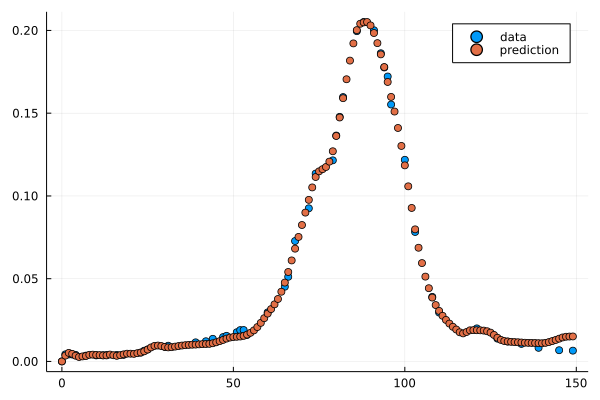

0.0003369997678979406

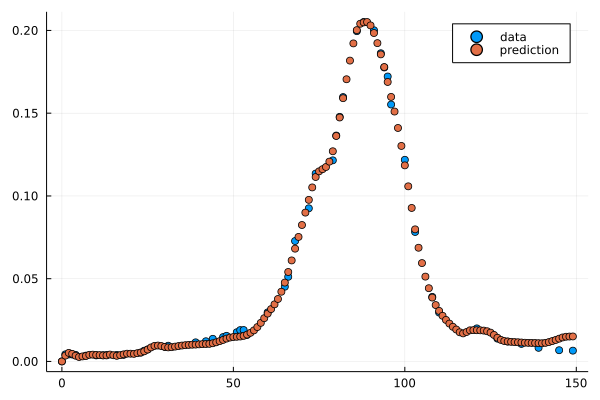

false

In [96]:
t8 = 149.0
prob_neuralode = NeuralODE(dudt2, (0.0,t8), Tsit5(), saveat = 0:t8)
result_neuralode9 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode8.u,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)
callback(result_neuralode8.u,loss_neuralode(result_neuralode9.u)...;doplot=true)callback(result_neuralode9.u,loss_neuralode(result_neuralode9.u)...;doplot=true)

0.01405665033999872

0.45126270379195854

0.14731239066342003

0.21649823586323916

0.045908511507004035

0.17932119620338488

0.1257536385111647

0.10421251252086094

0.15001875378443258

0.17287214923507088

0.1390754578663005

0.0842153744681008

0.08092605365404901

0.0662233458725959

0.059181129363187125

0.06095137152628941

0.07625975999865693

0.08308253657945891

0.06796201255376863

0.048642431577845154

0.041427694560774726

0.043398444273451506

0.0461030273118913

0.04600819367915898

0.04260914897286565

0.0373903667829852

0.03113253391682643

0.02416702247742445

0.020134673546471048

0.021118757711542476

0.02362975339157225

0.022834676150794098

0.019468125321753828

0.015936168136591242

0.013559931002677859

0.013145290195966924

0.013818122513859898

0.014675513095110573

0.015058554312059623

0.014297395839508278

0.01297016039620907

0.012074731001452526

0.011630571183210191

0.010936019577931614

0.010184245722451267

0.011121886497301111

0.010223965370150955

0.01084488006548931

0.010325921262000643

0.010000594181258331

0.009897433686406368

0.00923843160890375

0.009356186851373783

0.008815117245096867

0.008727707538103367

0.008696484125801075

0.00824376485996405

0.008409567124277435

0.00815511087016664

0.008051988817490426

0.007893525990209729

0.00774956082623964

0.007587487649125268

0.007358908766749279

0.0073825657311849145

0.007293613857538524

0.0073100148057818354

0.00713880270054992

0.006977403000025282

0.0069217148273375

0.00682556383418904

0.006778444519196262

0.006732747810727958

0.006523668260428586

0.006468411274730098

0.006426163730082478

0.006258604155286839

0.0062441010332153594

0.006107328577004618

0.006115302906098617

0.005991890657611187

0.006000256080910662

0.00577013323951451

0.005706301615809991

0.0056572717746455016

0.005663777903701702

0.005568516732673321

0.005555974873312043

0.005493429620601277

0.005459251182942435

0.0053689286637932775

0.005233600922504836

0.005266385454698657

0.005144878602750353

0.005109566802234423

0.00503850318702691

0.004944109311576498

0.004972219604006907

0.004837375469504707

0.004791353102728402

0.00479281408494793

0.00474747330556672

0.004657289626368794

0.004590181363561791

0.004563024444429346

0.004480614447445614

0.004487228960237383

0.004438149618139689

0.004405971317022462

0.004318524132066938

0.004319414342162932

0.004254532014680418

0.00428339712252109

0.004190885014366824

0.004122199872916834

0.004087969719845128

0.004094703654814588

0.004008279081068733

0.003967488578775507

0.003967135770496085

0.003917942427419874

0.003876536389304199

0.0038617280627954963

0.0037689160660113203

0.0037545195107632793

0.003757512680902686

0.0038178524135949908

0.0036798093513877254

0.0036468808190068254

0.003627557936464628

0.00358042343318761

0.00349307515847233

0.0035156462884579917

0.003412370464414136

0.003425174463430989

0.0034321661574967157

0.003361099319051232

0.0033773872021140854

0.003301060799305741

0.003238125200003852

0.003182825118995137

0.003170682651508109

0.003160049234012907

0.0031176879329446842

0.0030447585689254847

0.002993210276243044

0.002946912723233641

0.0029554362523417804

0.0028445386518984143

0.0028240988623360625

0.0028390460212877784

0.002777885241138722

0.0027087955537977984

0.0026841598076091525

0.0026302400073292733

0.0025626167401585484

0.0025059778790805214

0.002449123044472745

0.002408696268295344

0.0023765398810572202

0.0022743376270893947

0.0022633955347202456

0.002177708347659826

0.0021375385271841735

0.002073113727022503

0.002053097917246872

0.001939609786039267

0.0018764340968765035

0.0018163934626428345

0.001809844507343821

0.001739774394712247

0.0017083245705060055

0.001664865934192414

0.0016392394537086158

0.0015803322798727253

0.0015619338804969385

0.0015282856764462062

0.001496081160978889

0.0015127959712104312

0.0014289534090355079

0.0014384478379631063

0.0014322110308539174

0.001373236686935237

0.001352666013572177

0.0013268115278363933

0.0013440007340069777

0.001320798122389589

0.001282341834253039

0.0012641120699217944

0.0012496263573609423

0.0012571817043250339

0.0012594046179274503

0.0012248267322505883

0.001223443108718156

0.0012276530497043205

0.0012180740211249024

0.0012278458743489556

0.001185407829436549

0.001189034125114646

0.0012212704748827538

0.0011648159040056345

0.001191519663123666

0.0012250134947839992

0.0011461768348738366

0.0012097068617285235

0.0011499444230150572

0.0011441903689448161

0.0012026479412555254

0.001108812131436215

0.0011289692118477575

0.0011415084036883326

0.0010876828875867254

0.001090652640546913

0.0011563081984714157

0.0010718804571933007

0.0010890836315617803

0.0011375593908125488

0.0010726159536216875

0.001037935167719628

0.0010446686058286153

0.0010385326975838978

0.0010290310765289135

0.0010384110755796614

0.0010243712835997835

0.001021370487301649

0.0009948941892269024

0.0009602796857888702

0.0009980242496815458

0.0010260991638199933

0.000996797108725275

0.0009866511927716561

0.0009675344400649204

0.0009737571737019432

0.0009779439525562693

0.0009687194686112811

0.0009655859294938258

0.001003639501665052

0.0009943285096503359

0.0009462467977892078

0.0009526753764761559

0.0009515889218495231

0.0009410768303176148

0.0009408268252948118

0.0009346013699094076

0.000932888836892946

0.0009290521339673437

0.0009261289346297627

0.0009733145767815193

0.0009881751069345558

0.0009487448884526636

0.0009046784333310312

0.0009132480320466036

0.0009066339301702804

0.0009164433101764649

0.0008951253004976845

0.0009109288236045063

0.00092213584158569

0.000956014909110945

0.0009163028903975977

0.0008866922513863345

0.0009193303258688503

0.0008610991446680261

0.0009011510909967901

0.0009252109068586442

0.0008893055526004946

0.0008922166446716641

0.0009814438280751354

0.0009833923448667708

0.00086122334533544

0.0009286049618455136

0.0010726257465953387

0.0009710153261437514

0.0008482181349531089

0.0008576363227883711

0.0009112701789597596

0.0008808615031038149

0.0008252675075755088

0.0008616910018793831

0.0009325408649623194

0.0008670542117509166

0.0008270617113278801

0.0008782588656855804

0.0009397230998044811

0.0008826530583781011

0.0008264462539581648

0.0008389449223832102

0.0008634382303607579

0.0008508564444020549

0.0008625749786392388

0.0008377661623853978

0.0008346562875187228

0.0007973832909914217

0.0008052949638299159

0.0008281803515829721

0.0008108004266513564

0.0007684953911965127

0.0008291058749186702

0.0009016987322825225

0.0008593480591220723

0.0007971378894406851

0.0008644077371132556

0.0010244797599897307

0.000997051615017267

0.0008328777608502036

0.0007949804091238837

0.0009142481839005198

0.000966515055645313

0.0008934062553413293

0.0007983317773034021

0.000784878465184216

0.0008630630371613487

0.0008712677384467355

0.0008184458296242173

0.0007615548197134901

0.00075681440504333

0.0007893148131347897

0.0008332150051770053

0.0008278500513286679

0.0007746348032079956

0.0007671547834353352

0.0008101109253114988

0.0008625740554376184

0.0008576837642041882

0.0008080498513090324

0.0007897611785426885

0.0007571924238703291

0.0007118546729860487

0.0008122385584263742

0.0008512373885048455

0.0007499438703964531

0.000763319332066544

0.000984791425332374

0.0011396717890765694

0.0009251895778547997

0.000732067503893406

0.0007495441408150297

0.000875605036561944

0.0008773437090136225

0.0008325878501388294

0.0007386496263559823

0.0007224380263084781

0.0008174690781068694

0.0008812748797349322

0.0007720972537346478

0.000728111404976788

0.000865607570114332

0.0010740741464424538

0.0011477831808170214

0.0008361562503425647

0.000706985282512135

0.0007106433348024359

0.0008058127313401881

0.0008389919679844822

0.0007789626172554382

0.0007100496666304578

0.0007030214353224076

0.0008042363117854753

0.0008711518754473274

0.000871608778908077

0.0008221842254112556

0.0007823346904553799

0.0006969120827804259

0.0006748466698458643

0.0006926151948063294

0.0007747728312794783

0.0009018460886924233

0.0008980231554099131

0.0007802621142299087

0.0006700201058944287

0.0007119563113718968

0.0007458257275168744

0.0007393492376106298

0.0007612919362647961

0.0007007773768996235

0.0006757905119480557

0.0007013788206801749

0.0007588037195295672

0.0007984476049858182

0.0007989546333211855

0.0007617179428916844

0.0007165845431549131

0.0006894016221625391

0.0006686128158695263

0.0006806741532856095

0.0007246793989170836

0.0007507348750817536

0.0008323691591603493

0.0009208513666632499

0.0009915516230887631

0.0008373400569395787

0.0007189701921860688

0.0006597208766787575

0.000677808441857018

0.0008035701386045541

0.0009428469708389614

0.0012710409483755022

0.0017356933182691794

0.001373595072862545

0.0010558444054758604

0.0007723461597614536

0.0006611983607831578

0.0007776278799050773

0.0011020511650075906

0.0014004204440477119

0.0011873753229958174

0.0011389482231664231

0.0012186517946125557

0.0014037099514657796

0.0014389363921214658

0.001199864270749708

0.0008096141364984522

0.0006766379013621175

0.0006825074090637404

0.0007399053951346769

0.0007239792760775987

0.0007064890134516364

0.0006756100155664536

0.0006649826019143051

0.0007271844839132274

0.0009059087677917457

0.0011420437911406716

0.0012481241578864762

0.0010626141508376776

0.0008650660236030022

0.0006912776316633087

0.000638010050044911

0.000703082769402157

0.0008847297344854854

0.001178531211934019

0.0014075021071358134

0.0015084851272606252

0.0014932682577601492

0.0010133575630306866

0.0006780047501855377

0.0006836088968609788

0.0010819119790493068

0.001497270917921343

0.0015402107588903863

0.0018107000453830744

0.0014936655148358334

0.0014819989263982157

0.0009379957016036247

0.0007034895440533278

0.0006479774404375816

0.0007049969548904185

0.0007924808512538583

0.0010601375586472208

0.0012718328681232138

0.0017977028484621941

0.002397394184385024

0.0020419423119237322

0.0017626862703033282

0.0008502514971480666

0.0009101582442237863

0.0016061529969218912

0.000990157156585826

0.0006955153894815195

0.0011025864421071755

0.0013857454922967254

0.0014300259065149743

0.0015376683436496967

0.0015488407478050177

0.0017765295390680396

0.0020578080948811615

0.0013086531835667659

0.0007573951588742756

0.0007906812687213275

0.0012058316485694769

0.0017220914160398

0.001191800002282502

0.0008114086416163125

0.0006393580941143992

0.000630697508624288

0.0006745177131265509

0.0007285707163968393

0.0007605558824461703

0.0007810871897600473

0.0008936896889195085

0.001006209626173831

0.0010511832719477163

0.0010314487056473608

0.0008902862304494504

0.0007091945123578185

0.0006102057545242271

0.0006250470322187599

0.0007097706627301544

0.0008237299481178452

0.0010314385464661915

0.001579100075611421

0.002037551314351464

0.002948210540755809

0.0011745528533065176

0.000826081506840041

0.001223224375563934

0.0008270676874593811

0.0006366220018153646

0.0006869080731409878

0.0010349641011867246

0.0016808478579097398

0.002494566945841566

0.005333599941720441

0.003155507745982871

0.001543937912460851

0.0012906531009162826

0.0026532900775804473

0.0013116120844372725

0.0019243976227176205

0.002688905150605028

0.0010036457088369458

0.0018924422293565397

0.002343598981434388

0.0008777110943943153

0.0012615600203155868

0.003908487685771448

0.007289123315580753

0.0024863673024789314

0.0010861017927843838

0.001781714524994807

0.0010587305293395981

0.0017226538836165673

0.001747056123078712

0.0010385121977216538

0.001823442510873297

0.0008689149631446833

0.0012950473341909825

0.002018767859779766

0.0017564773529868082

0.0009132753053224664

0.0012584890964243678

0.0027516218614014806

0.0011798002862117188

0.0007664053210317033

0.0014331417899124286

0.000996184030772819

0.00098223374895828

0.0010319834346189214

0.0007797528386250814

0.0006767244855293692

0.0008807359307758761

0.0015182052849173372

0.002659600251755879

0.0015910661517426557

0.0010299707043491349

0.0007285824701425496

0.0007456263683633551

0.0009889190039510832

0.0007818963621962427

0.0007395162683200536

0.0010541461612222354

0.0009421789246491946

0.0006514713999268774

0.0007296380432068625

0.0012269722558327341

0.0016753097428865577

0.0019562211201379553

0.002095355802416046

0.0011671325044638895

0.0008535550214599633

0.001214870369508619

0.0007984247585639073

0.0011541840550231956

0.0019799258045237584

0.0009561176575632043

0.0006563605423730427

0.001140843006958479

0.00198074384721973

0.0030007376160625593

0.0019268359813197624

0.0013252948086634804

0.0009946179110291622

0.0011854902646523703

0.0009397177571920348

0.0010602172283917406

0.0011422032536955627

0.0010657794999761254

0.0007271131980163304

0.0006276201346114976

0.0007737467269766839

0.000986735312326445

0.0015463968380263812

0.0020936073436714333

0.002805484532732461

0.0011076105633812264

0.0014047089992001546

0.0027462850850681537

0.0013048784506972861

0.0015711419946528348

0.0024375635615810852

0.0008785522644700256

0.0011356516037842534

0.003254059307872094

0.001656226444475801

0.000841477605332756

0.0006081439025824697

0.0007903675775177252

0.0011986074496471814

0.0010925333405515164

0.000707017648208662

0.0006627198997447857

0.001143622289427359

0.001635794296079883

0.001470337431734007

0.001156471603512005

0.0006321680338774624

0.0007775097469390086

0.0012190330422905695

0.0011735295586652152

0.000746461820982112

0.0005560685142369139

0.0006652508846520872

0.0009327454516212458

0.0012214140480092293

0.001627797366661451

0.0012514224340826237

0.0007846501650611844

0.0005819929242506705

0.0006253964853418432

0.0008134920492625382

0.0009881733500648156

0.0010089519973101428

0.0009368537840114222

0.0006786029781522071

0.0005629509482835178

0.0006054736167771415

0.0005829455679878727

0.0006043628958362098

0.0005668306364047597

0.0006028254811386715

0.0007706431266976928

0.0009195085166126576

0.0008839303781789447

0.0006649416582445005

0.0005562420306529563

0.0005514477567342242

0.0006373072728551307

0.0008045001935920465

0.0009184732782641488

0.0009921841903910828

0.0008716490738074752

0.000891598877446542

0.0009356029636426097

0.0013195057236598028

0.002184719039675482

0.0021896909822775603

0.0024171819304691844

0.0008366060293892466

0.0014703950137995385

0.00301789604371676

0.0012335414861670306

0.0015497976707859586

0.004457906877165878

0.003046534735908695

0.0016012713702686678

0.0012883856664714802

0.001943443390969527

0.0012669331008022745

0.0012132990520304636

0.001855005281727289

0.0008987619844617745

0.0019359546234477044

0.00179962516076103

0.0008660590620802681

0.0017180753089518646

0.0009075958996048125

0.0006661487592568564

0.0007152386675296268

0.0009422633001295804

0.0009043195959907714

0.0007138734715013692

0.0006427630220989891

0.0005712802625051131

0.0005913655389842124

0.0006851056521399579

0.0007401664664893834

0.0009823924645646336

0.0010663823856909172

0.0011579423039463125

0.0011418070679306593

0.0011461205735044514

0.0013932928357697624

0.0016382432023998828

0.0011426437983788292

0.0007855595223785097

0.0006364628757846201

0.000606563666519166

0.0006383903054247271

0.0007455507307202256

0.0008017704117050828

0.0009578949510764099

0.0013404831876326223

0.002108929633530257

0.004113377936087314

0.0015012107468984207

0.0009421694336906087

0.0016231106410883424

0.0009335298747731942

0.0009957094851065285

0.0012649276246978099

0.0006460524400556261

0.000798457516067623

0.0015618136943234251

0.0028136721704061013

0.0059650245306486875

0.00274298437774135

0.0010979302486478566

0.0020993748727819485

0.00306908614243101

0.0011346636223744779

0.0024896044483502236

0.004035419266534423

0.0009830420070905948

0.002865679265708899

0.004518350088184783

0.002985052629729132

0.0010672143206972766

0.002531699860082521

0.0009383933581752861

0.001951421292508593

0.002658851780449137

0.0032128624267655373

0.0017224850424648976

0.0033194585043570014

0.006922343605628232

0.0016271862641089414

0.003950364231921582

0.0060867261729102215

0.0011404722819960058

0.0038696439532615963

0.0017362204919042401

0.002150633125494785

0.0027103399026844645

0.0011809070610003364

0.003052056104570629

0.0013424075809688831

0.0016452230502116924

0.00329686625164107

0.0011142280791435828

0.00254857080871013

0.0009232109372952723

0.0025206971668853854

0.0017358895344409082

0.0012666838167559305

0.0015347107529000608

0.0010675422290602624

0.0015743040975006414

0.0010049252856174187

0.0012509876019017195

0.00101701165364161

0.0008940165042112564

0.0009663722450905289

0.0007036680310932878

0.0007932295451416526

0.0010080408649960982

0.0011329669526244349

0.000980876553333132

0.0007960747677332696

0.0006969666222542629

0.0006115730075586436

0.0006414359487686252

0.0007143970385880722

0.0007311068195971798

0.0006918740898350345

0.0006834655571462454

0.0006326133855522659

0.0006330184799204777

0.0006524332749822685

0.000685368160249234

0.000623379937299898

0.0005882479519267157

0.0005873759735436125

0.0006015232089475842

0.000619390598922289

0.0005956640186784899

0.0005630201062894747

0.000575917058985792

0.0005893992286240466

0.000716856624938293

0.0010336726610501279

0.0014286775551813913

0.0013133002346901268

0.0012738873516215349

0.0006461187590076882

0.0007147232588647946

0.0013247903788067

0.0013448242073691964

0.0014009999462227516

0.0006471396396737211

0.0007219721088201654

0.001171412988606624

0.0010557594976029977

0.0009131557766102631

0.0007159211558163825

0.0005888705376255209

0.000601786209266271

0.0005883339956267937

0.0005531095506596032

0.0005452565404813783

0.000537752645841576

0.0005392322780719274

0.0005541187847472881

0.0005645530109734408

0.0006158617368943129

0.0006958248337953351

0.0008358694959982456

0.0011242460840600703

0.0016594835812031613

0.001604759730707353

0.0012551083199638855

0.0005742526293820229

0.000994471616449645

0.0015349924962203968

0.0007822584059117766

0.0005836539064727323

0.001248165256384981

0.0013311729657466134

0.0013160756356264648

0.000912127510039593

0.0006057405200225838

0.0005273017068179612

0.0008230896583106381

0.00156830015896264

0.001820989433970627

0.002328575672142468

0.0007211941287358662

0.003566909512083001

0.006659676126327114

0.0017597869465947815

0.0037384928761714244

0.0076833896231255205

0.0010817754573729838

0.008096456537671735

0.018315527391341305

0.0015173323340198822

0.013540685471720156

0.005394413362914891

0.006897879829961387

0.008550439437309227

0.0019871801462227646

0.009105782987179649

0.0014262494832141869

0.006583549619333285

0.002096771311198029

0.0035410145779039156

0.003588612410058424

0.0020122545670182425

0.004430777116119106

0.0009370329392026694

0.0032099844454105586

0.003877877029330581

0.001329315104102824

0.002576822294269744

0.0017976789864093475

0.003792081229486304

0.005398385547827058

0.006879112736247238

0.00832069172174014

0.006570571188765183

0.007538421181341338

0.011144241612914324

0.003851544340407435

0.006323320243258664

0.00864269846513193

0.004568202248374316

0.00885183032265482

0.004042202676521279

0.00891155932292577

0.0026928106720626338

0.007112859043166133

0.003939421105897741

0.004665367077413922

0.002969774096157602

0.004161750486443712

0.002471699724061407

0.0025156116568557526

0.0025576755612333486

0.002119788105316429

0.004513371015785242

0.0023089889067240896

0.0015015113098678803

0.00316766888897327

0.0022860190268320195

0.0020830285112459703

0.0011080233064532637

0.001743746173108646

0.0017801489235605421

0.0016462944243388112

0.0018272889514878263

0.0011619808374417

0.0015449048572323736

0.0014807565926179317

0.001291854985482483

0.001239906725698488

0.0010608442405702883

0.0011688370851933988

0.001067625518809537

0.001190404215264868

0.0009401883060023191

0.0010011638541509564

0.0011672667274530287

0.0008658236426750018

0.0009903759583693693

0.000891635267388359

0.0007854912083226719

0.0009034419253373626

0.0008098031390301129

0.0006816391961089671

0.0007548776673197805

0.0007250673602580389

0.000683613015850391

0.0006980755786838103

0.0006447230848647048

0.0006314949687049056

0.0006809871969175927

0.0006519327529881066

0.0006279119873182584

0.0006582291685409109

0.0006408650986184153

0.0006113297506708838

0.0006330756783517524

0.0006011196096340161

0.0005980753253696404

0.0006222054773625844

0.0005846025282016696

0.000611277828345368

0.0005764745356832535

0.0005793020449987419

0.0005716959100862445

0.000559649355544984

0.0005919825576558067

0.0005797422256012749

0.0005425190802505227

0.0005626837683097666

0.0005587497190612691

0.0005413666699435934

0.0005507230940897856

0.0005420452248326333

0.0005322647074707761

0.0005396015032230347

0.0005249195409141406

0.0006021291986603365

0.0005762299573406922

0.0005140834268644196

0.0005256225118089046

0.000537450454351479

0.0005062629803156145

0.0005218373285914234

0.0005424440497543787

0.000502945550144807

0.0004970705743193929

0.000511748161965538

0.0005033145134256008

0.0004977667468696061

0.0005002321152919332

0.0004861104588814158

0.0004982857467759169

0.0004909174224666496

0.000491284559354738

0.0004956776525710887

0.0004758643363975531

0.00047514287530829195

0.000494950470437371

0.0004918337462763749

0.0004957985660935514

0.00047926518777724155

0.0005087458880201178

0.0004917068974373641

0.00047255666234977155

0.0004848509302658984

0.0004654749454945281

0.00047339674835559283

0.00047085606928369474

0.0004836871156631338

0.0005152933420727373

0.000476252802118417

0.00047266149939720017

0.0004890939309846816

0.00045777185591353074

0.0004799757340281736

0.0004906190331689977

0.00046093164631776237

0.00046211600130194156

0.0004912748588221009

0.0004572347063461006

0.0004483065681316032

0.0004441400101321253

0.00045068903254190395

0.00048280144725559176

0.00047718910911118237

0.00045298065361660525

0.00044364618513586255

0.0004735575942629998

0.0004763410396587034

0.00043920144062933815

0.0005161993319681133

0.0005984832157944125

0.0004594673620035885

0.0005133135383857398

0.0006818105125156021

0.0006866016495184347

0.000479622656571704

0.00043920144062933815

0.00043920144062933815

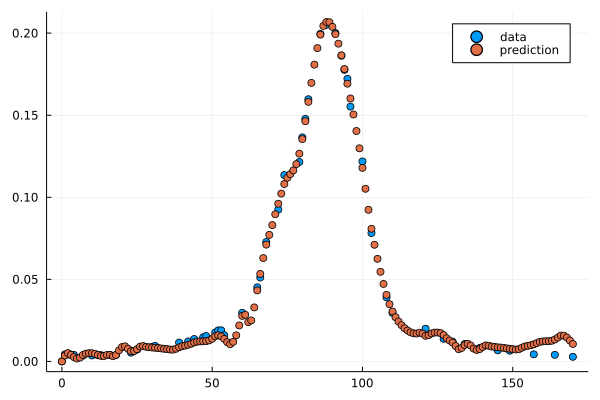

0.00043920144062933815

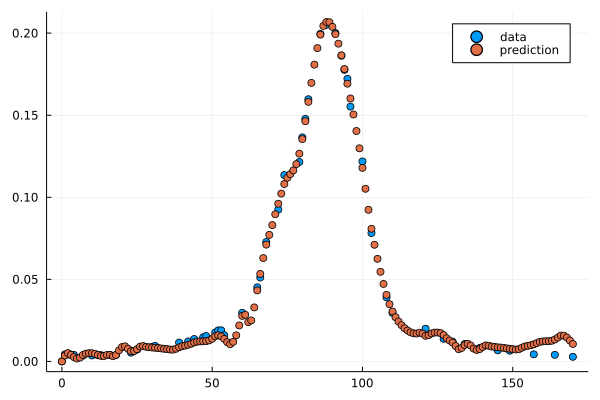

false

In [97]:
t9 = 170.0
prob_neuralode = NeuralODE(dudt2, (0.0,t9), Tsit5(), saveat = 0:t9)
result_neuralode10 = DiffEqFlux.sciml_train(loss_neuralode,
                                           result_neuralode9.u,
                                           ADAM(), maxiters = 1000,
                                           cb = callback)
callback(result_neuralode10.u,loss_neuralode(result_neuralode10.u)...;doplot=true)callback(result_neuralode10.u,loss_neuralode(result_neuralode10.u)...;doplot=true)

In [98]:
writedlm("NeuralODE_covid_try2.txt",predict_neuralode(result_neuralode10.u)[1,:])